In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%load_ext line_profiler

In [31]:
import json
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [32]:
from predict import Model
from predict import load_data
from utils import imsetshow

## 1.0 Configuration

In [47]:
config_file_path = "../config/config.json"
with open(config_file_path, "r") as read_file:
    config = json.load(read_file)
    
checkpoint_dir = config["paths"]["checkpoint_dir"]
run_subfolder = 'training_8b_full_ESA_ft_200VM'
checkpoint_filename = 'HRNet.pth'
checkpoint_file = os.path.join('..', checkpoint_dir, run_subfolder, checkpoint_filename)
# print(checkpoint_file)
assert os.path.isfile(checkpoint_file)

## 1.1 Load model

In [48]:
model = Model(config)
model.load_checkpoint(checkpoint_file=checkpoint_file)

## 1.2 Load data

In [49]:
train_dataset, val_dataset, test_dataset, baseline_cpsnrs = load_data(config_file_path, val_proportion=0.10, top_k=-1)

## 1.3 Run evaluation

In [50]:
results = model.evaluate(train_dataset, val_dataset, test_dataset, baseline_cpsnrs)

HR After loading:  [[ 5120  5120  5120 ... 12288 13824 15104]
 [ 5120  5120  6400 ... 12800 14336 16128]
 [ 5120  6400  7168 ... 13824 16128 17408]
 ...
 [31744 31232 32000 ... 32256 31744 33280]
 [31744 32000 32768 ... 33024 32256 33024]
 [32768 33024 34048 ... 32512 32000 32768]]
 HR with CV:  [[[ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [ 48  48  48]
  [ 54  54  54]
  [ 59  59  59]]

 [[ 20  20  20]
  [ 20  20  20]
  [ 25  25  25]
  ...
  [ 50  50  50]
  [ 56  56  56]
  [ 63  63  63]]

 [[ 20  20  20]
  [ 25  25  25]
  [ 28  28  28]
  ...
  [ 54  54  54]
  [ 63  63  63]
  [ 68  68  68]]

 ...

 [[124 124 124]
  [122 122 122]
  [125 125 125]
  ...
  [126 126 126]
  [124 124 124]
  [130 130 130]]

 [[124 124 124]
  [125 125 125]
  [128 128 128]
  ...
  [129 129 129]
  [126 126 126]
  [129 129 129]]

 [[128 128 128]
  [129 129 129]
  [133 133 133]
  ...
  [127 127 127]
  [125 125 125]
  [128 128 128]]]
LR before tensor:  [[[ 5376 10240 15616 ... 14080 12544 16896]
  [ 9728 1

HR After loading:  [[ 5632 16640 20992 ... 25856 25600 24576]
 [ 5632  5632 14848 ... 28672 26880 25088]
 [ 5376  5376  5632 ... 28160 26112 25600]
 ...
 [17664 15616 13312 ... 32000 32256 31744]
 [14848 13824 12032 ... 29952 29952 30464]
 [13312 11776  8192 ... 28928 29696 29184]]
 HR with CV:  [[[ 22  22  22]
  [ 65  65  65]
  [ 82  82  82]
  ...
  [101 101 101]
  [100 100 100]
  [ 96  96  96]]

 [[ 22  22  22]
  [ 22  22  22]
  [ 58  58  58]
  ...
  [112 112 112]
  [105 105 105]
  [ 98  98  98]]

 [[ 21  21  21]
  [ 21  21  21]
  [ 22  22  22]
  ...
  [110 110 110]
  [102 102 102]
  [100 100 100]]

 ...

 [[ 69  69  69]
  [ 61  61  61]
  [ 52  52  52]
  ...
  [125 125 125]
  [126 126 126]
  [124 124 124]]

 [[ 58  58  58]
  [ 54  54  54]
  [ 47  47  47]
  ...
  [117 117 117]
  [117 117 117]
  [119 119 119]]

 [[ 52  52  52]
  [ 46  46  46]
  [ 32  32  32]
  ...
  [113 113 113]
  [116 116 116]
  [114 114 114]]]
LR before tensor:  [[[ 5632 24832 30720 ... 29440 27648 25856]
  [ 5376  

HR After loading:  [[18944 19456 18944 ...  4864  4864  4864]
 [20992 19968 19712 ...  4864  4864  4864]
 [21248 19456 20480 ...  4864  4864  4864]
 ...
 [45824 45312 45312 ... 24576 24576 24320]
 [45824 44800 44288 ... 24064 24064 23808]
 [45056 44544 44032 ... 23808 23552 23296]]
 HR with CV:  [[[ 74  74  74]
  [ 76  76  76]
  [ 74  74  74]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 82  82  82]
  [ 78  78  78]
  [ 77  77  77]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 83  83  83]
  [ 76  76  76]
  [ 80  80  80]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]

 ...

 [[179 179 179]
  [177 177 177]
  [177 177 177]
  ...
  [ 96  96  96]
  [ 96  96  96]
  [ 95  95  95]]

 [[179 179 179]
  [175 175 175]
  [173 173 173]
  ...
  [ 94  94  94]
  [ 94  94  94]
  [ 93  93  93]]

 [[176 176 176]
  [174 174 174]
  [172 172 172]
  ...
  [ 93  93  93]
  [ 92  92  92]
  [ 91  91  91]]]
LR before tensor:  [[[16896 16896 17408 ...  4864  4864  4864]
  [14848 1

HR After loading:  [[16640 15872 14080 ... 12800 12800 12032]
 [14848 13824 13056 ... 14080 13056 12288]
 [13056 12288 11264 ... 13568 13056 12288]
 ...
 [15616 16384 16640 ... 16128 15872 15104]
 [15616 16384 17408 ... 17408 16640 16128]
 [14592 15360 16128 ... 18688 18176 17408]]
 HR with CV:  [[[65 65 65]
  [62 62 62]
  [55 55 55]
  ...
  [50 50 50]
  [50 50 50]
  [47 47 47]]

 [[58 58 58]
  [54 54 54]
  [51 51 51]
  ...
  [55 55 55]
  [51 51 51]
  [48 48 48]]

 [[51 51 51]
  [48 48 48]
  [44 44 44]
  ...
  [53 53 53]
  [51 51 51]
  [48 48 48]]

 ...

 [[61 61 61]
  [64 64 64]
  [65 65 65]
  ...
  [63 63 63]
  [62 62 62]
  [59 59 59]]

 [[61 61 61]
  [64 64 64]
  [68 68 68]
  ...
  [68 68 68]
  [65 65 65]
  [63 63 63]]

 [[57 57 57]
  [60 60 60]
  [63 63 63]
  ...
  [73 73 73]
  [71 71 71]
  [68 68 68]]]
LR before tensor:  [[[13056 11008 10496 ... 15104 13568 12288]
  [ 8448  9216  8704 ... 15104 14592 10752]
  [ 7424  9728 10752 ... 14336 12032 11008]
  ...
  [10240 14080 15872 ...

HR After loading:  [[11264 11520 11264 ... 41984 46080 45056]
 [12032 11776 11264 ... 41472 45312 45056]
 [12800 11776 10752 ... 41472 42752 43520]
 ...
 [19712 19200 18944 ...  4864  4864  4864]
 [19712 20224 19968 ...  4864  4864  4864]
 [19712 19968 19712 ...  4864  4864  4864]]
 HR with CV:  [[[ 44  44  44]
  [ 45  45  45]
  [ 44  44  44]
  ...
  [164 164 164]
  [180 180 180]
  [176 176 176]]

 [[ 47  47  47]
  [ 46  46  46]
  [ 44  44  44]
  ...
  [162 162 162]
  [177 177 177]
  [176 176 176]]

 [[ 50  50  50]
  [ 46  46  46]
  [ 42  42  42]
  ...
  [162 162 162]
  [167 167 167]
  [170 170 170]]

 ...

 [[ 77  77  77]
  [ 75  75  75]
  [ 74  74  74]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 77  77  77]
  [ 79  79  79]
  [ 78  78  78]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 77  77  77]
  [ 78  78  78]
  [ 77  77  77]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]]
LR before tensor:  [[[11776  9728  8704 ... 37632 33792 45312]
  [12544 1

HR After loading:  [[42752 43264 43008 ... 46848 47360 47616]
 [41216 42752 43008 ... 47104 47616 48128]
 [40960 42496 43264 ... 47360 48384 48384]
 ...
 [30464 31488 30976 ... 43264 43776 45056]
 [30720 32000 32000 ... 44032 45056 46080]
 [30976 32768 32256 ... 44800 45824 47616]]
 HR with CV:  [[[167 167 167]
  [169 169 169]
  [168 168 168]
  ...
  [183 183 183]
  [185 185 185]
  [186 186 186]]

 [[161 161 161]
  [167 167 167]
  [168 168 168]
  ...
  [184 184 184]
  [186 186 186]
  [188 188 188]]

 [[160 160 160]
  [166 166 166]
  [169 169 169]
  ...
  [185 185 185]
  [189 189 189]
  [189 189 189]]

 ...

 [[119 119 119]
  [123 123 123]
  [121 121 121]
  ...
  [169 169 169]
  [171 171 171]
  [176 176 176]]

 [[120 120 120]
  [125 125 125]
  [125 125 125]
  ...
  [172 172 172]
  [176 176 176]
  [180 180 180]]

 [[121 121 121]
  [128 128 128]
  [126 126 126]
  ...
  [175 175 175]
  [179 179 179]
  [186 186 186]]]
LR before tensor:  [[[42752 44288 42752 ... 44032 46080 47616]
  [41984 4

HR After loading:  [[17408 16896 16384 ... 20992 20480 20480]
 [16640 16384 16128 ... 19968 19712 19968]
 [17664 17408 16640 ... 18944 18944 19712]
 ...
 [20224 20224 20736 ... 42240 41472 39680]
 [21504 21504 21760 ... 41728 39936 37888]
 [22784 22528 22528 ... 42752 39680 36864]]
 HR with CV:  [[[ 68  68  68]
  [ 66  66  66]
  [ 64  64  64]
  ...
  [ 82  82  82]
  [ 80  80  80]
  [ 80  80  80]]

 [[ 65  65  65]
  [ 64  64  64]
  [ 63  63  63]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 78  78  78]]

 [[ 69  69  69]
  [ 68  68  68]
  [ 65  65  65]
  ...
  [ 74  74  74]
  [ 74  74  74]
  [ 77  77  77]]

 ...

 [[ 79  79  79]
  [ 79  79  79]
  [ 81  81  81]
  ...
  [165 165 165]
  [162 162 162]
  [155 155 155]]

 [[ 84  84  84]
  [ 84  84  84]
  [ 85  85  85]
  ...
  [163 163 163]
  [156 156 156]
  [148 148 148]]

 [[ 89  89  89]
  [ 88  88  88]
  [ 88  88  88]
  ...
  [167 167 167]
  [155 155 155]
  [144 144 144]]]
LR before tensor:  [[[16384 15360 16896 ... 17408 19200 19712]
  [18688 2

HR After loading:  [[26368 24576 21760 ... 33536 32000 31488]
 [24576 23296 20992 ... 33792 32512 32512]
 [23296 22016 20224 ... 33792 32256 31744]
 ...
 [12032 12032 11520 ... 14336 15360 16384]
 [12032 11264  8960 ... 14592 15616 16384]
 [11264 10240  9216 ... 15104 16128 17408]]
 HR with CV:  [[[103 103 103]
  [ 96  96  96]
  [ 85  85  85]
  ...
  [131 131 131]
  [125 125 125]
  [123 123 123]]

 [[ 96  96  96]
  [ 91  91  91]
  [ 82  82  82]
  ...
  [132 132 132]
  [127 127 127]
  [127 127 127]]

 [[ 91  91  91]
  [ 86  86  86]
  [ 79  79  79]
  ...
  [132 132 132]
  [126 126 126]
  [124 124 124]]

 ...

 [[ 47  47  47]
  [ 47  47  47]
  [ 45  45  45]
  ...
  [ 56  56  56]
  [ 60  60  60]
  [ 64  64  64]]

 [[ 47  47  47]
  [ 44  44  44]
  [ 35  35  35]
  ...
  [ 57  57  57]
  [ 61  61  61]
  [ 64  64  64]]

 [[ 44  44  44]
  [ 40  40  40]
  [ 36  36  36]
  ...
  [ 59  59  59]
  [ 63  63  63]
  [ 68  68  68]]]
LR before tensor:  [[[21248 18432 15872 ... 31744 32768 29696]
  [17920 1

HR After loading:  [[19712 18432 16896 ... 35072 35072 34048]
 [17152 16384 15616 ... 33280 33280 33024]
 [16128 16128 15872 ... 34048 34560 34816]
 ...
 [22272 22272 23296 ... 45824 45312 45056]
 [23808 24832 24320 ... 45568 44800 44032]
 [24576 25600 25344 ... 44800 43776 43008]]
 HR with CV:  [[[ 77  77  77]
  [ 72  72  72]
  [ 66  66  66]
  ...
  [137 137 137]
  [137 137 137]
  [133 133 133]]

 [[ 67  67  67]
  [ 64  64  64]
  [ 61  61  61]
  ...
  [130 130 130]
  [130 130 130]
  [129 129 129]]

 [[ 63  63  63]
  [ 63  63  63]
  [ 62  62  62]
  ...
  [133 133 133]
  [135 135 135]
  [136 136 136]]

 ...

 [[ 87  87  87]
  [ 87  87  87]
  [ 91  91  91]
  ...
  [179 179 179]
  [177 177 177]
  [176 176 176]]

 [[ 93  93  93]
  [ 97  97  97]
  [ 95  95  95]
  ...
  [178 178 178]
  [175 175 175]
  [172 172 172]]

 [[ 96  96  96]
  [100 100 100]
  [ 99  99  99]
  ...
  [175 175 175]
  [171 171 171]
  [168 168 168]]]
LR before tensor:  [[[15872 13824 15360 ... 35584 33792 31744]
  [15616 1

HR After loading:  [[18944 19456 18944 ... 23808 23808 26112]
 [19712 19968 19200 ... 24832 26368 28160]
 [20224 19712 19712 ... 27648 27904 29184]
 ...
 [21248 21248 22016 ...  8448  8448  8448]
 [21248 21760 22528 ...  9984 10240 10752]
 [22016 22272 22784 ... 12032 12288 11776]]
 HR with CV:  [[[ 74  74  74]
  [ 76  76  76]
  [ 74  74  74]
  ...
  [ 93  93  93]
  [ 93  93  93]
  [102 102 102]]

 [[ 77  77  77]
  [ 78  78  78]
  [ 75  75  75]
  ...
  [ 97  97  97]
  [103 103 103]
  [110 110 110]]

 [[ 79  79  79]
  [ 77  77  77]
  [ 77  77  77]
  ...
  [108 108 108]
  [109 109 109]
  [114 114 114]]

 ...

 [[ 83  83  83]
  [ 83  83  83]
  [ 86  86  86]
  ...
  [ 33  33  33]
  [ 33  33  33]
  [ 33  33  33]]

 [[ 83  83  83]
  [ 85  85  85]
  [ 88  88  88]
  ...
  [ 39  39  39]
  [ 40  40  40]
  [ 42  42  42]]

 [[ 86  86  86]
  [ 87  87  87]
  [ 89  89  89]
  ...
  [ 47  47  47]
  [ 48  48  48]
  [ 46  46  46]]]
LR before tensor:  [[[20736 19968 18944 ... 27648 26624 27136]
  [20992 2

HR After loading:  [[30976 33024 33024 ... 24832 25600 26624]
 [33536 33792 33536 ... 25856 26368 27648]
 [34816 35072 34304 ... 27392 27392 27904]
 ...
 [40704 41728 41984 ... 19456 19712 20736]
 [41216 41728 41728 ... 20992 21248 21504]
 [41728 40448 41216 ... 22016 22528 22784]]
 HR with CV:  [[[121 121 121]
  [129 129 129]
  [129 129 129]
  ...
  [ 97  97  97]
  [100 100 100]
  [104 104 104]]

 [[131 131 131]
  [132 132 132]
  [131 131 131]
  ...
  [101 101 101]
  [103 103 103]
  [108 108 108]]

 [[136 136 136]
  [137 137 137]
  [134 134 134]
  ...
  [107 107 107]
  [107 107 107]
  [109 109 109]]

 ...

 [[159 159 159]
  [163 163 163]
  [164 164 164]
  ...
  [ 76  76  76]
  [ 77  77  77]
  [ 81  81  81]]

 [[161 161 161]
  [163 163 163]
  [163 163 163]
  ...
  [ 82  82  82]
  [ 83  83  83]
  [ 84  84  84]]

 [[163 163 163]
  [158 158 158]
  [161 161 161]
  ...
  [ 86  86  86]
  [ 88  88  88]
  [ 89  89  89]]]
LR before tensor:  [[[30976 31744 33024 ... 18944 22272 24064]
  [32000 3

HR After loading:  [[47360 47104 46592 ... 41728 42240 42496]
 [47872 47104 46592 ... 41984 41984 41984]
 [47616 47104 46592 ... 43008 42496 41984]
 ...
 [45824 46080 45056 ... 37632 38144 37888]
 [46592 46848 45568 ... 38144 38400 36096]
 [46848 45824 44800 ... 38400 37632 35840]]
 HR with CV:  [[[185 185 185]
  [184 184 184]
  [182 182 182]
  ...
  [163 163 163]
  [165 165 165]
  [166 166 166]]

 [[187 187 187]
  [184 184 184]
  [182 182 182]
  ...
  [164 164 164]
  [164 164 164]
  [164 164 164]]

 [[186 186 186]
  [184 184 184]
  [182 182 182]
  ...
  [168 168 168]
  [166 166 166]
  [164 164 164]]

 ...

 [[179 179 179]
  [180 180 180]
  [176 176 176]
  ...
  [147 147 147]
  [149 149 149]
  [148 148 148]]

 [[182 182 182]
  [183 183 183]
  [178 178 178]
  ...
  [149 149 149]
  [150 150 150]
  [141 141 141]]

 [[183 183 183]
  [179 179 179]
  [175 175 175]
  ...
  [150 150 150]
  [147 147 147]
  [140 140 140]]]
LR before tensor:  [[[45568 45568 44288 ... 42752 41728 40704]
  [46080 4

HR After loading:  [[19968 20480 20736 ... 25088 23552 22528]
 [20992 20736 20992 ... 23296 22272 20736]
 [21248 20992 20736 ... 22272 21504 19712]
 ...
 [30720 30976 30464 ... 35840 33792 30720]
 [31488 30976 30720 ... 32768 30208 28672]
 [32000 32000 32000 ... 28672 28160 25856]]
 HR with CV:  [[[ 78  78  78]
  [ 80  80  80]
  [ 81  81  81]
  ...
  [ 98  98  98]
  [ 92  92  92]
  [ 88  88  88]]

 [[ 82  82  82]
  [ 81  81  81]
  [ 82  82  82]
  ...
  [ 91  91  91]
  [ 87  87  87]
  [ 81  81  81]]

 [[ 83  83  83]
  [ 82  82  82]
  [ 81  81  81]
  ...
  [ 87  87  87]
  [ 84  84  84]
  [ 77  77  77]]

 ...

 [[120 120 120]
  [121 121 121]
  [119 119 119]
  ...
  [140 140 140]
  [132 132 132]
  [120 120 120]]

 [[123 123 123]
  [121 121 121]
  [120 120 120]
  ...
  [128 128 128]
  [118 118 118]
  [112 112 112]]

 [[125 125 125]
  [125 125 125]
  [125 125 125]
  ...
  [112 112 112]
  [110 110 110]
  [101 101 101]]]
LR before tensor:  [[[22272 22528 23040 ... 33024 28416 23552]
  [22528 2

HR After loading:  [[36096 35840 35840 ... 25856 26112 25344]
 [37120 38144 38144 ... 24832 24832 24576]
 [38400 37888 38144 ... 21504 21760 21248]
 ...
 [16128 16384 16896 ... 11520 11776 10752]
 [17408 17664 17920 ... 11008  9472  8448]
 [18688 18944 17920 ...  8960  7680  5376]]
 HR with CV:  [[[141 141 141]
  [140 140 140]
  [140 140 140]
  ...
  [101 101 101]
  [102 102 102]
  [ 99  99  99]]

 [[145 145 145]
  [149 149 149]
  [149 149 149]
  ...
  [ 97  97  97]
  [ 97  97  97]
  [ 96  96  96]]

 [[150 150 150]
  [148 148 148]
  [149 149 149]
  ...
  [ 84  84  84]
  [ 85  85  85]
  [ 83  83  83]]

 ...

 [[ 63  63  63]
  [ 64  64  64]
  [ 66  66  66]
  ...
  [ 45  45  45]
  [ 46  46  46]
  [ 42  42  42]]

 [[ 68  68  68]
  [ 69  69  69]
  [ 70  70  70]
  ...
  [ 43  43  43]
  [ 37  37  37]
  [ 33  33  33]]

 [[ 73  73  73]
  [ 74  74  74]
  [ 70  70  70]
  ...
  [ 35  35  35]
  [ 30  30  30]
  [ 21  21  21]]]
LR before tensor:  [[[38144 35072 33024 ... 25344 26624 24832]
  [35584 3

HR After loading:  [[ 6912  7168  6912 ... 18688 18688 18688]
 [ 6656  6656  6912 ... 19712 19968 20480]
 [ 6656  6656  6656 ... 20480 22272 20480]
 ...
 [56064 56064 56064 ... 44544 45056 45312]
 [56064 56064 55808 ... 45056 45056 44288]
 [56064 56064 56320 ... 45056 45056 44544]]
 HR with CV:  [[[ 27  27  27]
  [ 28  28  28]
  [ 27  27  27]
  ...
  [ 73  73  73]
  [ 73  73  73]
  [ 73  73  73]]

 [[ 26  26  26]
  [ 26  26  26]
  [ 27  27  27]
  ...
  [ 77  77  77]
  [ 78  78  78]
  [ 80  80  80]]

 [[ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]
  ...
  [ 80  80  80]
  [ 87  87  87]
  [ 80  80  80]]

 ...

 [[219 219 219]
  [219 219 219]
  [219 219 219]
  ...
  [174 174 174]
  [176 176 176]
  [177 177 177]]

 [[219 219 219]
  [219 219 219]
  [218 218 218]
  ...
  [176 176 176]
  [176 176 176]
  [173 173 173]]

 [[219 219 219]
  [219 219 219]
  [220 220 220]
  ...
  [176 176 176]
  [176 176 176]
  [174 174 174]]]
LR before tensor:  [[[ 6400  6400  6144 ... 16640 19712 19200]
  [ 6144  

HR After loading:  [[ 7424  6912  7168 ... 22784 22016 19968]
 [ 5888  7424  9984 ... 20992 20224 18944]
 [ 7680 10752 11264 ... 19968 19200 18176]
 ...
 [15104 15104 15616 ... 18944 19456 20224]
 [15616 16128 16384 ... 17664 17152 17664]
 [15872 17408 16896 ... 19456 18688 18688]]
 HR with CV:  [[[29 29 29]
  [27 27 27]
  [28 28 28]
  ...
  [89 89 89]
  [86 86 86]
  [78 78 78]]

 [[23 23 23]
  [29 29 29]
  [39 39 39]
  ...
  [82 82 82]
  [79 79 79]
  [74 74 74]]

 [[30 30 30]
  [42 42 42]
  [44 44 44]
  ...
  [78 78 78]
  [75 75 75]
  [71 71 71]]

 ...

 [[59 59 59]
  [59 59 59]
  [61 61 61]
  ...
  [74 74 74]
  [76 76 76]
  [79 79 79]]

 [[61 61 61]
  [63 63 63]
  [64 64 64]
  ...
  [69 69 69]
  [67 67 67]
  [69 69 69]]

 [[62 62 62]
  [68 68 68]
  [66 66 66]
  ...
  [76 76 76]
  [73 73 73]
  [73 73 73]]]
LR before tensor:  [[[ 9216 13312 13824 ... 20480 23040 23296]
  [15872 17664 16640 ... 19456 23040 20480]
  [15360 17408 16384 ... 18944 19200 16640]
  ...
  [19712 15872 14592 ...

HR After loading:  [[33536 32768 32000 ... 31744 30976 30208]
 [34304 33024 31744 ... 31232 30464 30208]
 [34816 33024 31744 ... 31488 31232 30720]
 ...
 [33792 33280 32512 ... 24576 25088 25344]
 [34048 34048 33536 ... 25600 26368 25856]
 [35328 34560 34304 ... 26880 27392 25600]]
 HR with CV:  [[[131 131 131]
  [128 128 128]
  [125 125 125]
  ...
  [124 124 124]
  [121 121 121]
  [118 118 118]]

 [[134 134 134]
  [129 129 129]
  [124 124 124]
  ...
  [122 122 122]
  [119 119 119]
  [118 118 118]]

 [[136 136 136]
  [129 129 129]
  [124 124 124]
  ...
  [123 123 123]
  [122 122 122]
  [120 120 120]]

 ...

 [[132 132 132]
  [130 130 130]
  [127 127 127]
  ...
  [ 96  96  96]
  [ 98  98  98]
  [ 99  99  99]]

 [[133 133 133]
  [133 133 133]
  [131 131 131]
  ...
  [100 100 100]
  [103 103 103]
  [101 101 101]]

 [[138 138 138]
  [135 135 135]
  [134 134 134]
  ...
  [105 105 105]
  [107 107 107]
  [100 100 100]]]
LR before tensor:  [[[37120 35840 38400 ... 38656 37120 34304]
  [37376 3

HR After loading:  [[39680 39168 40704 ... 23040 23040 23040]
 [37632 38144 38912 ... 22528 22272 22016]
 [35072 35072 36352 ... 22272 22272 22528]
 ...
 [35072 33792 33280 ... 26112 26112 25088]
 [33280 33024 32000 ... 24064 24064 23040]
 [32512 30976 29952 ... 22528 22016 21504]]
 HR with CV:  [[[155 155 155]
  [153 153 153]
  [159 159 159]
  ...
  [ 90  90  90]
  [ 90  90  90]
  [ 90  90  90]]

 [[147 147 147]
  [149 149 149]
  [152 152 152]
  ...
  [ 88  88  88]
  [ 87  87  87]
  [ 86  86  86]]

 [[137 137 137]
  [137 137 137]
  [142 142 142]
  ...
  [ 87  87  87]
  [ 87  87  87]
  [ 88  88  88]]

 ...

 [[137 137 137]
  [132 132 132]
  [130 130 130]
  ...
  [102 102 102]
  [102 102 102]
  [ 98  98  98]]

 [[130 130 130]
  [129 129 129]
  [125 125 125]
  ...
  [ 94  94  94]
  [ 94  94  94]
  [ 90  90  90]]

 [[127 127 127]
  [121 121 121]
  [117 117 117]
  ...
  [ 88  88  88]
  [ 86  86  86]
  [ 84  84  84]]]
LR before tensor:  [[[38144 40448 39680 ... 20736 22784 22272]
  [35840 4

HR After loading:  [[20480 19456 18432 ... 21248 17664 12800]
 [19456 18688 17408 ... 20224 15872 15104]
 [18688 17664 16384 ... 18944 16640 18176]
 ...
 [29952 30208 30720 ... 16128 16128 15360]
 [29440 29440 30976 ... 15104 15104 14592]
 [28928 29696 31232 ... 14080 13568 13568]]
 HR with CV:  [[[ 80  80  80]
  [ 76  76  76]
  [ 72  72  72]
  ...
  [ 83  83  83]
  [ 69  69  69]
  [ 50  50  50]]

 [[ 76  76  76]
  [ 73  73  73]
  [ 68  68  68]
  ...
  [ 79  79  79]
  [ 62  62  62]
  [ 59  59  59]]

 [[ 73  73  73]
  [ 69  69  69]
  [ 64  64  64]
  ...
  [ 74  74  74]
  [ 65  65  65]
  [ 71  71  71]]

 ...

 [[117 117 117]
  [118 118 118]
  [120 120 120]
  ...
  [ 63  63  63]
  [ 63  63  63]
  [ 60  60  60]]

 [[115 115 115]
  [115 115 115]
  [121 121 121]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 57  57  57]]

 [[113 113 113]
  [116 116 116]
  [122 122 122]
  ...
  [ 55  55  55]
  [ 53  53  53]
  [ 53  53  53]]]
LR before tensor:  [[[19712 15872 14080 ... 28928 25856 17664]
  [16896 1

HR After loading:  [[ 4864  4864  4864 ... 34816 34304 33792]
 [ 4864  4864  4864 ... 34304 34048 34816]
 [ 4864  4864  4864 ... 35072 35584 36096]
 ...
 [ 4864  4864  4864 ... 50944 53248 51456]
 [ 4864  4864  4864 ... 52736 51456 50944]
 [ 4864  4864  4864 ... 52480 51968 50944]]
 HR with CV:  [[[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [136 136 136]
  [134 134 134]
  [132 132 132]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [134 134 134]
  [133 133 133]
  [136 136 136]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [137 137 137]
  [139 139 139]
  [141 141 141]]

 ...

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [199 199 199]
  [208 208 208]
  [201 201 201]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [206 206 206]
  [201 201 201]
  [199 199 199]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [205 205 205]
  [203 203 203]
  [199 199 199]]]
LR before tensor:  [[[ 4864  4864  4864 ... 36096 34816 34048]
  [ 4864  

HR After loading:  [[27904 27648 27392 ... 12288  9216  7680]
 [28416 29440 28928 ...  9728  8192  6656]
 [29440 30208 29440 ...  8960  7168  5120]
 ...
 [33536 33024 31488 ...  8448  9472 10496]
 [33536 32000 30976 ...  9472 10496 10752]
 [32000 31232 30208 ... 12800 11520 11520]]
 HR with CV:  [[[109 109 109]
  [108 108 108]
  [107 107 107]
  ...
  [ 48  48  48]
  [ 36  36  36]
  [ 30  30  30]]

 [[111 111 111]
  [115 115 115]
  [113 113 113]
  ...
  [ 38  38  38]
  [ 32  32  32]
  [ 26  26  26]]

 [[115 115 115]
  [118 118 118]
  [115 115 115]
  ...
  [ 35  35  35]
  [ 28  28  28]
  [ 20  20  20]]

 ...

 [[131 131 131]
  [129 129 129]
  [123 123 123]
  ...
  [ 33  33  33]
  [ 37  37  37]
  [ 41  41  41]]

 [[131 131 131]
  [125 125 125]
  [121 121 121]
  ...
  [ 37  37  37]
  [ 41  41  41]
  [ 42  42  42]]

 [[125 125 125]
  [122 122 122]
  [118 118 118]
  ...
  [ 50  50  50]
  [ 45  45  45]
  [ 45  45  45]]]
LR before tensor:  [[[25344 25344 25600 ... 11520 12288  7168]
  [24576 2

HR After loading:  [[22272 22272 22784 ...  4864  5120  4864]
 [22528 22784 22784 ...  5120  4864  4864]
 [21760 22272 22784 ...  4864  4864  4864]
 ...
 [ 5120  5120  5120 ... 21504 21760 21504]
 [ 5120  5120  4864 ... 23296 23552 22272]
 [ 5120  5120  5120 ... 23808 23040 22016]]
 HR with CV:  [[[87 87 87]
  [87 87 87]
  [89 89 89]
  ...
  [19 19 19]
  [20 20 20]
  [19 19 19]]

 [[88 88 88]
  [89 89 89]
  [89 89 89]
  ...
  [20 20 20]
  [19 19 19]
  [19 19 19]]

 [[85 85 85]
  [87 87 87]
  [89 89 89]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 ...

 [[20 20 20]
  [20 20 20]
  [20 20 20]
  ...
  [84 84 84]
  [85 85 85]
  [84 84 84]]

 [[20 20 20]
  [20 20 20]
  [19 19 19]
  ...
  [91 91 91]
  [92 92 92]
  [87 87 87]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]
  ...
  [93 93 93]
  [90 90 90]
  [86 86 86]]]
LR before tensor:  [[[20480 21760 21248 ...  4864  4864  4864]
  [22016 20224 17408 ...  4864  4864  4864]
  [20224 12544 16384 ...  4864  5120  4864]
  ...
  [14336 22784 24832 ...

HR After loading:  [[43264 42752 42496 ... 35328 33792 32000]
 [44288 43776 44288 ... 34560 32512 30720]
 [45056 45312 44544 ... 33280 30976 29184]
 ...
 [43264 43776 45056 ... 24064 24832 24832]
 [42752 43264 43264 ... 24576 25088 25856]
 [41984 41984 41472 ... 25088 25856 26880]]
 HR with CV:  [[[169 169 169]
  [167 167 167]
  [166 166 166]
  ...
  [138 138 138]
  [132 132 132]
  [125 125 125]]

 [[173 173 173]
  [171 171 171]
  [173 173 173]
  ...
  [135 135 135]
  [127 127 127]
  [120 120 120]]

 [[176 176 176]
  [177 177 177]
  [174 174 174]
  ...
  [130 130 130]
  [121 121 121]
  [114 114 114]]

 ...

 [[169 169 169]
  [171 171 171]
  [176 176 176]
  ...
  [ 94  94  94]
  [ 97  97  97]
  [ 97  97  97]]

 [[167 167 167]
  [169 169 169]
  [169 169 169]
  ...
  [ 96  96  96]
  [ 98  98  98]
  [101 101 101]]

 [[164 164 164]
  [164 164 164]
  [162 162 162]
  ...
  [ 98  98  98]
  [101 101 101]
  [105 105 105]]]
LR before tensor:  [[[42240 45056 46592 ... 38400 35584 31232]
  [40448 3

HR After loading:  [[12800 12544 15360 ... 12032 11008  9216]
 [14336 15872 16896 ... 10752  9472  9216]
 [15872 16896 17920 ...  9728  8960  8960]
 ...
 [14336 15104 15104 ... 13568 13056 12288]
 [15360 15616 15872 ... 12544 12288 13056]
 [16128 16896 15104 ... 12544 12544 12288]]
 HR with CV:  [[[50 50 50]
  [49 49 49]
  [60 60 60]
  ...
  [47 47 47]
  [43 43 43]
  [36 36 36]]

 [[56 56 56]
  [62 62 62]
  [66 66 66]
  ...
  [42 42 42]
  [37 37 37]
  [36 36 36]]

 [[62 62 62]
  [66 66 66]
  [70 70 70]
  ...
  [38 38 38]
  [35 35 35]
  [35 35 35]]

 ...

 [[56 56 56]
  [59 59 59]
  [59 59 59]
  ...
  [53 53 53]
  [51 51 51]
  [48 48 48]]

 [[60 60 60]
  [61 61 61]
  [62 62 62]
  ...
  [49 49 49]
  [48 48 48]
  [51 51 51]]

 [[63 63 63]
  [66 66 66]
  [59 59 59]
  ...
  [49 49 49]
  [49 49 49]
  [48 48 48]]]
LR before tensor:  [[[13312 15872 12800 ... 11776 10496  8448]
  [13568 14848 14080 ...  9728  9728  8192]
  [15104 14080 15616 ... 10496  9472  7936]
  ...
  [ 9472 10240  9216 ...

HR After loading:  [[30976 29440 28416 ... 21248 20480 19712]
 [29696 28672 26624 ... 19456 19200 18944]
 [28160 26368 24320 ... 19712 19968 19968]
 ...
 [25856 26624 28416 ... 20224 21760 22784]
 [28160 29440 32512 ... 22016 23040 24064]
 [27904 30976 28160 ... 23552 24064 24832]]
 HR with CV:  [[[121 121 121]
  [115 115 115]
  [111 111 111]
  ...
  [ 83  83  83]
  [ 80  80  80]
  [ 77  77  77]]

 [[116 116 116]
  [112 112 112]
  [104 104 104]
  ...
  [ 76  76  76]
  [ 75  75  75]
  [ 74  74  74]]

 [[110 110 110]
  [103 103 103]
  [ 95  95  95]
  ...
  [ 77  77  77]
  [ 78  78  78]
  [ 78  78  78]]

 ...

 [[101 101 101]
  [104 104 104]
  [111 111 111]
  ...
  [ 79  79  79]
  [ 85  85  85]
  [ 89  89  89]]

 [[110 110 110]
  [115 115 115]
  [127 127 127]
  ...
  [ 86  86  86]
  [ 90  90  90]
  [ 94  94  94]]

 [[109 109 109]
  [121 121 121]
  [110 110 110]
  ...
  [ 92  92  92]
  [ 94  94  94]
  [ 97  97  97]]]
LR before tensor:  [[[26368 20224 13824 ... 20736 18944 17408]
  [19200 1

HR After loading:  [[16128 17152 17664 ... 21248 20992 20224]
 [16640 17664 18432 ... 25088 22272 21248]
 [17408 18688 19712 ... 23552 22016 21760]
 ...
 [32768 32512 33024 ... 28160 28672 29952]
 [33280 32512 32512 ... 28672 29440 30976]
 [32768 32000 32000 ... 29440 31232 31744]]
 HR with CV:  [[[ 63  63  63]
  [ 67  67  67]
  [ 69  69  69]
  ...
  [ 83  83  83]
  [ 82  82  82]
  [ 79  79  79]]

 [[ 65  65  65]
  [ 69  69  69]
  [ 72  72  72]
  ...
  [ 98  98  98]
  [ 87  87  87]
  [ 83  83  83]]

 [[ 68  68  68]
  [ 73  73  73]
  [ 77  77  77]
  ...
  [ 92  92  92]
  [ 86  86  86]
  [ 85  85  85]]

 ...

 [[128 128 128]
  [127 127 127]
  [129 129 129]
  ...
  [110 110 110]
  [112 112 112]
  [117 117 117]]

 [[130 130 130]
  [127 127 127]
  [127 127 127]
  ...
  [112 112 112]
  [115 115 115]
  [121 121 121]]

 [[128 128 128]
  [125 125 125]
  [125 125 125]
  ...
  [115 115 115]
  [122 122 122]
  [124 124 124]]]
LR before tensor:  [[[20224 22528 21760 ... 21760 26624 25344]
  [24320 2

HR After loading:  [[16384 16128 15104 ... 27648 27904 28928]
 [15360 15360 14592 ... 27904 28160 29440]
 [14592 14592 13824 ... 27392 28160 29440]
 ...
 [ 4864  5120  5120 ... 22784 24320 26624]
 [ 4864  5120  4864 ... 16896 19712 25856]
 [ 4864  4864  4864 ...  5376 14592 17408]]
 HR with CV:  [[[ 64  64  64]
  [ 63  63  63]
  [ 59  59  59]
  ...
  [108 108 108]
  [109 109 109]
  [113 113 113]]

 [[ 60  60  60]
  [ 60  60  60]
  [ 57  57  57]
  ...
  [109 109 109]
  [110 110 110]
  [115 115 115]]

 [[ 57  57  57]
  [ 57  57  57]
  [ 54  54  54]
  ...
  [107 107 107]
  [110 110 110]
  [115 115 115]]

 ...

 [[ 19  19  19]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [ 89  89  89]
  [ 95  95  95]
  [104 104 104]]

 [[ 19  19  19]
  [ 20  20  20]
  [ 19  19  19]
  ...
  [ 66  66  66]
  [ 77  77  77]
  [101 101 101]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 21  21  21]
  [ 57  57  57]
  [ 68  68  68]]]
LR before tensor:  [[[16128 14336 13568 ... 24064 26368 29184]
  [14336 1

HR After loading:  [[30976 30464 30208 ... 31232 32768 34048]
 [31232 31232 30720 ... 32512 35072 34560]
 [31488 31488 30720 ... 34816 34560 31232]
 ...
 [23296 23040 23552 ... 40448 39680 37888]
 [25600 25856 26368 ... 40704 39168 37888]
 [25344 24832 25088 ... 40960 39168 38144]]
 HR with CV:  [[[121 121 121]
  [119 119 119]
  [118 118 118]
  ...
  [122 122 122]
  [128 128 128]
  [133 133 133]]

 [[122 122 122]
  [122 122 122]
  [120 120 120]
  ...
  [127 127 127]
  [137 137 137]
  [135 135 135]]

 [[123 123 123]
  [123 123 123]
  [120 120 120]
  ...
  [136 136 136]
  [135 135 135]
  [122 122 122]]

 ...

 [[ 91  91  91]
  [ 90  90  90]
  [ 92  92  92]
  ...
  [158 158 158]
  [155 155 155]
  [148 148 148]]

 [[100 100 100]
  [101 101 101]
  [103 103 103]
  ...
  [159 159 159]
  [153 153 153]
  [148 148 148]]

 [[ 99  99  99]
  [ 97  97  97]
  [ 98  98  98]
  ...
  [160 160 160]
  [153 153 153]
  [149 149 149]]]
LR before tensor:  [[[34048 31232 31232 ... 30720 32512 38144]
  [32000 2

HR After loading:  [[16896 14848 11008 ... 14848 16640 16128]
 [16384 13824 11264 ... 13568 13824 13568]
 [14848 12800 11776 ... 11776 13312 13312]
 ...
 [24320 22784 20480 ... 18944 18688 17920]
 [24064 21760 19968 ... 17920 18176 18688]
 [21760 20480 19200 ... 16896 17408 18176]]
 HR with CV:  [[[66 66 66]
  [58 58 58]
  [43 43 43]
  ...
  [58 58 58]
  [65 65 65]
  [63 63 63]]

 [[64 64 64]
  [54 54 54]
  [44 44 44]
  ...
  [53 53 53]
  [54 54 54]
  [53 53 53]]

 [[58 58 58]
  [50 50 50]
  [46 46 46]
  ...
  [46 46 46]
  [52 52 52]
  [52 52 52]]

 ...

 [[95 95 95]
  [89 89 89]
  [80 80 80]
  ...
  [74 74 74]
  [73 73 73]
  [70 70 70]]

 [[94 94 94]
  [85 85 85]
  [78 78 78]
  ...
  [70 70 70]
  [71 71 71]
  [73 73 73]]

 [[85 85 85]
  [80 80 80]
  [75 75 75]
  ...
  [66 66 66]
  [68 68 68]
  [71 71 71]]]
LR before tensor:  [[[11776  8960  9216 ...  5376 11008 11776]
  [ 9472  8448 10752 ... 11776 13312 12544]
  [ 7424  9984 10752 ... 11520 12800  8960]
  ...
  [16896 17664 16640 ...

HR After loading:  [[29952 30464 31232 ... 12544 13056 15104]
 [30464 30976 29184 ... 13568 14848 16896]
 [30208 30720 29184 ... 14592 16896 15872]
 ...
 [14080 12800 12800 ... 21504 22272 23296]
 [12544 11264 11264 ... 22272 23040 24576]
 [11520  9984  9216 ... 23296 24576 24832]]
 HR with CV:  [[[117 117 117]
  [119 119 119]
  [122 122 122]
  ...
  [ 49  49  49]
  [ 51  51  51]
  [ 59  59  59]]

 [[119 119 119]
  [121 121 121]
  [114 114 114]
  ...
  [ 53  53  53]
  [ 58  58  58]
  [ 66  66  66]]

 [[118 118 118]
  [120 120 120]
  [114 114 114]
  ...
  [ 57  57  57]
  [ 66  66  66]
  [ 62  62  62]]

 ...

 [[ 55  55  55]
  [ 50  50  50]
  [ 50  50  50]
  ...
  [ 84  84  84]
  [ 87  87  87]
  [ 91  91  91]]

 [[ 49  49  49]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 87  87  87]
  [ 90  90  90]
  [ 96  96  96]]

 [[ 45  45  45]
  [ 39  39  39]
  [ 36  36  36]
  ...
  [ 91  91  91]
  [ 96  96  96]
  [ 97  97  97]]]
LR before tensor:  [[[29952 23808 21504 ... 15616 11008 14336]
  [29184 2

HR After loading:  [[ 5376  5632  5632 ...  4864  5120  4864]
 [ 5376  5632  5632 ...  4864  5120  4864]
 [ 5376  5376  5376 ...  4864  4864  4864]
 ...
 [18176 17408 18432 ... 23296 23040 23040]
 [17920 17408 17664 ... 22272 22528 22016]
 [17920 16896 16640 ... 21504 21760 21248]]
 HR with CV:  [[[21 21 21]
  [22 22 22]
  [22 22 22]
  ...
  [19 19 19]
  [20 20 20]
  [19 19 19]]

 [[21 21 21]
  [22 22 22]
  [22 22 22]
  ...
  [19 19 19]
  [20 20 20]
  [19 19 19]]

 [[21 21 21]
  [21 21 21]
  [21 21 21]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 ...

 [[71 71 71]
  [68 68 68]
  [72 72 72]
  ...
  [91 91 91]
  [90 90 90]
  [90 90 90]]

 [[70 70 70]
  [68 68 68]
  [69 69 69]
  ...
  [87 87 87]
  [88 88 88]
  [86 86 86]]

 [[70 70 70]
  [66 66 66]
  [65 65 65]
  ...
  [84 84 84]
  [85 85 85]
  [83 83 83]]]
LR before tensor:  [[[ 5888  5632  5120 ...  6144  4864  4864]
  [ 5376  5376  5376 ...  6400  5120  5120]
  [ 5376  5376  5632 ...  6912  4864  5120]
  ...
  [19712 19456 17664 ...

HR After loading:  [[17152 16384 16640 ... 43264 43264 42496]
 [16128 15872 15616 ... 41472 42240 42496]
 [15360 15104 15360 ... 42240 43264 43008]
 ...
 [24320 23808 22528 ... 50432 50432 49920]
 [27136 25600 25088 ... 50688 50432 49920]
 [30208 29184 25856 ... 50944 50176 49920]]
 HR with CV:  [[[ 67  67  67]
  [ 64  64  64]
  [ 65  65  65]
  ...
  [169 169 169]
  [169 169 169]
  [166 166 166]]

 [[ 63  63  63]
  [ 62  62  62]
  [ 61  61  61]
  ...
  [162 162 162]
  [165 165 165]
  [166 166 166]]

 [[ 60  60  60]
  [ 59  59  59]
  [ 60  60  60]
  ...
  [165 165 165]
  [169 169 169]
  [168 168 168]]

 ...

 [[ 95  95  95]
  [ 93  93  93]
  [ 88  88  88]
  ...
  [197 197 197]
  [197 197 197]
  [195 195 195]]

 [[106 106 106]
  [100 100 100]
  [ 98  98  98]
  ...
  [198 198 198]
  [197 197 197]
  [195 195 195]]

 [[118 118 118]
  [114 114 114]
  [101 101 101]
  ...
  [199 199 199]
  [196 196 196]
  [195 195 195]]]
LR before tensor:  [[[14336 13056 11264 ... 39936 40960 39424]
  [12800 1

HR After loading:  [[22016 20992 20736 ... 47616 46848 45824]
 [21248 20480 20480 ... 50688 50688 50688]
 [20736 20224 20224 ... 51200 51200 50432]
 ...
 [19968 19456 21248 ... 20736 18944 14080]
 [22016 21760 22784 ... 19968 19200 17664]
 [22784 23296 24832 ... 20480 20224 20224]]
 HR with CV:  [[[ 86  86  86]
  [ 82  82  82]
  [ 81  81  81]
  ...
  [186 186 186]
  [183 183 183]
  [179 179 179]]

 [[ 83  83  83]
  [ 80  80  80]
  [ 80  80  80]
  ...
  [198 198 198]
  [198 198 198]
  [198 198 198]]

 [[ 81  81  81]
  [ 79  79  79]
  [ 79  79  79]
  ...
  [200 200 200]
  [200 200 200]
  [197 197 197]]

 ...

 [[ 78  78  78]
  [ 76  76  76]
  [ 83  83  83]
  ...
  [ 81  81  81]
  [ 74  74  74]
  [ 55  55  55]]

 [[ 86  86  86]
  [ 85  85  85]
  [ 89  89  89]
  ...
  [ 78  78  78]
  [ 75  75  75]
  [ 69  69  69]]

 [[ 89  89  89]
  [ 91  91  91]
  [ 97  97  97]
  ...
  [ 80  80  80]
  [ 79  79  79]
  [ 79  79  79]]]
LR before tensor:  [[[21248 23552 22784 ... 48128 52480 51712]
  [20992 2

HR After loading:  [[21760 19968 19200 ... 30720 30720 30208]
 [22272 20480 19712 ... 30464 29184 27648]
 [21760 20224 19712 ... 28672 26624 25088]
 ...
 [ 8704  9216  9728 ... 25088 24320 23040]
 [ 9984 10240 10752 ... 23808 23296 22528]
 [10240 10752 11520 ... 22528 21248 20736]]
 HR with CV:  [[[ 85  85  85]
  [ 78  78  78]
  [ 75  75  75]
  ...
  [120 120 120]
  [120 120 120]
  [118 118 118]]

 [[ 87  87  87]
  [ 80  80  80]
  [ 77  77  77]
  ...
  [119 119 119]
  [114 114 114]
  [108 108 108]]

 [[ 85  85  85]
  [ 79  79  79]
  [ 77  77  77]
  ...
  [112 112 112]
  [104 104 104]
  [ 98  98  98]]

 ...

 [[ 34  34  34]
  [ 36  36  36]
  [ 38  38  38]
  ...
  [ 98  98  98]
  [ 95  95  95]
  [ 90  90  90]]

 [[ 39  39  39]
  [ 40  40  40]
  [ 42  42  42]
  ...
  [ 93  93  93]
  [ 91  91  91]
  [ 88  88  88]]

 [[ 40  40  40]
  [ 42  42  42]
  [ 45  45  45]
  ...
  [ 88  88  88]
  [ 83  83  83]
  [ 81  81  81]]]
LR before tensor:  [[[18944 16896 18176 ... 24576 27392 26880]
  [18176 1

HR After loading:  [[11520  9728 11520 ... 27904 28416 27136]
 [11008 12032 12288 ... 26112 26368 26368]
 [11776 12288 14592 ... 25088 24832 25344]
 ...
 [ 7168  8192  8704 ... 14080 13824 12544]
 [ 7680  8704  9984 ... 13056 12544 11776]
 [ 8448  9728 11264 ... 12544 11520 11776]]
 HR with CV:  [[[ 45  45  45]
  [ 38  38  38]
  [ 45  45  45]
  ...
  [109 109 109]
  [111 111 111]
  [106 106 106]]

 [[ 43  43  43]
  [ 47  47  47]
  [ 48  48  48]
  ...
  [102 102 102]
  [103 103 103]
  [103 103 103]]

 [[ 46  46  46]
  [ 48  48  48]
  [ 57  57  57]
  ...
  [ 98  98  98]
  [ 97  97  97]
  [ 99  99  99]]

 ...

 [[ 28  28  28]
  [ 32  32  32]
  [ 34  34  34]
  ...
  [ 55  55  55]
  [ 54  54  54]
  [ 49  49  49]]

 [[ 30  30  30]
  [ 34  34  34]
  [ 39  39  39]
  ...
  [ 51  51  51]
  [ 49  49  49]
  [ 46  46  46]]

 [[ 33  33  33]
  [ 38  38  38]
  [ 44  44  44]
  ...
  [ 49  49  49]
  [ 45  45  45]
  [ 46  46  46]]]
LR before tensor:  [[[11008 10496  8960 ... 25600 26112 25344]
  [ 9728 1

HR After loading:  [[24576 24576 25856 ... 12544 11008  8704]
 [23552 25088 27136 ... 11520  8192  5632]
 [21504 26368 28160 ...  8448  7424  6400]
 ...
 [10240  9728  9472 ... 13568 14080 14848]
 [ 7680  7680  6912 ... 13056 13568 14592]
 [ 5120  5376  5376 ... 12544 12800 14848]]
 HR with CV:  [[[ 96  96  96]
  [ 96  96  96]
  [101 101 101]
  ...
  [ 49  49  49]
  [ 43  43  43]
  [ 34  34  34]]

 [[ 92  92  92]
  [ 98  98  98]
  [106 106 106]
  ...
  [ 45  45  45]
  [ 32  32  32]
  [ 22  22  22]]

 [[ 84  84  84]
  [103 103 103]
  [110 110 110]
  ...
  [ 33  33  33]
  [ 29  29  29]
  [ 25  25  25]]

 ...

 [[ 40  40  40]
  [ 38  38  38]
  [ 37  37  37]
  ...
  [ 53  53  53]
  [ 55  55  55]
  [ 58  58  58]]

 [[ 30  30  30]
  [ 30  30  30]
  [ 27  27  27]
  ...
  [ 51  51  51]
  [ 53  53  53]
  [ 57  57  57]]

 [[ 20  20  20]
  [ 21  21  21]
  [ 21  21  21]
  ...
  [ 49  49  49]
  [ 50  50  50]
  [ 58  58  58]]]
LR before tensor:  [[[27392 32256 32512 ... 14592 14080  8704]
  [33280 3

HR After loading:  [[ 4864  4864  5120 ... 20224 18944 18176]
 [ 5120  4864  5120 ... 19456 18944 18944]
 [ 4864  4864  4864 ... 19712 19456 19456]
 ...
 [15616 16640 17920 ... 17152 17664 17408]
 [15872 16896 17920 ... 16640 17664 17664]
 [16896 17664 18432 ... 16640 17664 17408]]
 HR with CV:  [[[19 19 19]
  [19 19 19]
  [20 20 20]
  ...
  [79 79 79]
  [74 74 74]
  [71 71 71]]

 [[20 20 20]
  [19 19 19]
  [20 20 20]
  ...
  [76 76 76]
  [74 74 74]
  [74 74 74]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]
  ...
  [77 77 77]
  [76 76 76]
  [76 76 76]]

 ...

 [[61 61 61]
  [65 65 65]
  [70 70 70]
  ...
  [67 67 67]
  [69 69 69]
  [68 68 68]]

 [[62 62 62]
  [66 66 66]
  [70 70 70]
  ...
  [65 65 65]
  [69 69 69]
  [69 69 69]]

 [[66 66 66]
  [69 69 69]
  [72 72 72]
  ...
  [65 65 65]
  [69 69 69]
  [68 68 68]]]
LR before tensor:  [[[ 5120  5120  5120 ... 23808 23040 20736]
  [ 4864  4864  5120 ... 20992 21248 20736]
  [ 5120  7168 22016 ... 19712 21248 21760]
  ...
  [11008 14080 16896 ...

HR After loading:  [[38912 40448 41472 ... 20736 22016 23808]
 [39936 41984 40960 ... 23040 23808 24832]
 [40448 40960 40192 ... 24320 25344 26112]
 ...
 [50176 50688 50176 ... 23040 22528 22016]
 [50688 50944 51200 ... 24832 24320 24064]
 [50688 50688 50944 ... 24576 25344 25344]]
 HR with CV:  [[[152 152 152]
  [158 158 158]
  [162 162 162]
  ...
  [ 81  81  81]
  [ 86  86  86]
  [ 93  93  93]]

 [[156 156 156]
  [164 164 164]
  [160 160 160]
  ...
  [ 90  90  90]
  [ 93  93  93]
  [ 97  97  97]]

 [[158 158 158]
  [160 160 160]
  [157 157 157]
  ...
  [ 95  95  95]
  [ 99  99  99]
  [102 102 102]]

 ...

 [[196 196 196]
  [198 198 198]
  [196 196 196]
  ...
  [ 90  90  90]
  [ 88  88  88]
  [ 86  86  86]]

 [[198 198 198]
  [199 199 199]
  [200 200 200]
  ...
  [ 97  97  97]
  [ 95  95  95]
  [ 94  94  94]]

 [[198 198 198]
  [198 198 198]
  [199 199 199]
  ...
  [ 96  96  96]
  [ 99  99  99]
  [ 99  99  99]]]
LR before tensor:  [[[38656 36096 38144 ... 21760 16896 22016]
  [38144 3

HR After loading:  [[35840 36096 36608 ... 50432 50944 51200]
 [35328 35584 36096 ... 50944 51200 51200]
 [26368 34304 34304 ... 50944 50944 50944]
 ...
 [37632 38400 39168 ... 34304 44288 41728]
 [38912 40704 40704 ... 31488 38400 38656]
 [41472 41984 41984 ... 28416 33024 37120]]
 HR with CV:  [[[140 140 140]
  [141 141 141]
  [143 143 143]
  ...
  [197 197 197]
  [199 199 199]
  [200 200 200]]

 [[138 138 138]
  [139 139 139]
  [141 141 141]
  ...
  [199 199 199]
  [200 200 200]
  [200 200 200]]

 [[103 103 103]
  [134 134 134]
  [134 134 134]
  ...
  [199 199 199]
  [199 199 199]
  [199 199 199]]

 ...

 [[147 147 147]
  [150 150 150]
  [153 153 153]
  ...
  [134 134 134]
  [173 173 173]
  [163 163 163]]

 [[152 152 152]
  [159 159 159]
  [159 159 159]
  ...
  [123 123 123]
  [150 150 150]
  [151 151 151]]

 [[162 162 162]
  [164 164 164]
  [164 164 164]
  ...
  [111 111 111]
  [129 129 129]
  [145 145 145]]]
LR before tensor:  [[[35584 37120 20224 ... 50432 50432 51200]
  [19712 2

HR After loading:  [[22016 23296 25856 ...  9728  9472  9472]
 [22272 25344 29184 ... 12032 11520 11008]
 [20992 24832 28160 ... 15104 14080 12288]
 ...
 [20736 19456 17920 ... 25600 26624 27136]
 [20736 19456 17920 ... 27392 28672 28416]
 [20992 19200 18432 ... 30464 30720 29952]]
 HR with CV:  [[[ 86  86  86]
  [ 91  91  91]
  [101 101 101]
  ...
  [ 38  38  38]
  [ 37  37  37]
  [ 37  37  37]]

 [[ 87  87  87]
  [ 99  99  99]
  [114 114 114]
  ...
  [ 47  47  47]
  [ 45  45  45]
  [ 43  43  43]]

 [[ 82  82  82]
  [ 97  97  97]
  [110 110 110]
  ...
  [ 59  59  59]
  [ 55  55  55]
  [ 48  48  48]]

 ...

 [[ 81  81  81]
  [ 76  76  76]
  [ 70  70  70]
  ...
  [100 100 100]
  [104 104 104]
  [106 106 106]]

 [[ 81  81  81]
  [ 76  76  76]
  [ 70  70  70]
  ...
  [107 107 107]
  [112 112 112]
  [111 111 111]]

 [[ 82  82  82]
  [ 75  75  75]
  [ 72  72  72]
  ...
  [119 119 119]
  [120 120 120]
  [117 117 117]]]
LR before tensor:  [[[23808 34304 36096 ...  9472 10240 11264]
  [24576 2

HR After loading:  [[29184 28160 28672 ... 16128 15872 16128]
 [27904 27136 27136 ... 16128 16128 15872]
 [26112 25344 25088 ... 15360 15872 14848]
 ...
 [43264 43264 41984 ... 13312 13056 13056]
 [44032 43776 42752 ... 12288 12288 12544]
 [43776 43776 43264 ... 12288 12288 13056]]
 HR with CV:  [[[114 114 114]
  [110 110 110]
  [112 112 112]
  ...
  [ 63  63  63]
  [ 62  62  62]
  [ 63  63  63]]

 [[109 109 109]
  [106 106 106]
  [106 106 106]
  ...
  [ 63  63  63]
  [ 63  63  63]
  [ 62  62  62]]

 [[102 102 102]
  [ 99  99  99]
  [ 98  98  98]
  ...
  [ 60  60  60]
  [ 62  62  62]
  [ 58  58  58]]

 ...

 [[169 169 169]
  [169 169 169]
  [164 164 164]
  ...
  [ 52  52  52]
  [ 51  51  51]
  [ 51  51  51]]

 [[172 172 172]
  [171 171 171]
  [167 167 167]
  ...
  [ 48  48  48]
  [ 48  48  48]
  [ 49  49  49]]

 [[171 171 171]
  [171 171 171]
  [169 169 169]
  ...
  [ 48  48  48]
  [ 48  48  48]
  [ 51  51  51]]]
LR before tensor:  [[[25088 23552 23296 ... 13824 14080 14592]
  [19968 1

HR After loading:  [[20224 20480 22784 ... 28672 28672 30464]
 [18944 19968 21760 ... 29952 29696 30464]
 [18432 19200 21248 ... 29952 29696 29952]
 ...
 [10752 11008 10752 ... 20992 16384 15616]
 [11264 11264 11264 ... 14336 14080 13824]
 [11264 11520 11776 ... 11264 11264 11776]]
 HR with CV:  [[[ 79  79  79]
  [ 80  80  80]
  [ 89  89  89]
  ...
  [112 112 112]
  [112 112 112]
  [119 119 119]]

 [[ 74  74  74]
  [ 78  78  78]
  [ 85  85  85]
  ...
  [117 117 117]
  [116 116 116]
  [119 119 119]]

 [[ 72  72  72]
  [ 75  75  75]
  [ 83  83  83]
  ...
  [117 117 117]
  [116 116 116]
  [117 117 117]]

 ...

 [[ 42  42  42]
  [ 43  43  43]
  [ 42  42  42]
  ...
  [ 82  82  82]
  [ 64  64  64]
  [ 61  61  61]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 56  56  56]
  [ 55  55  55]
  [ 54  54  54]]

 [[ 44  44  44]
  [ 45  45  45]
  [ 46  46  46]
  ...
  [ 44  44  44]
  [ 44  44  44]
  [ 46  46  46]]]
LR before tensor:  [[[22784 26368 27904 ... 30976 33792 32512]
  [13568 1

HR After loading:  [[14080 14848 15104 ... 14592 14848 14848]
 [14080 14592 14592 ... 14848 14848 14336]
 [14336 14592 14336 ... 14592 14336 13568]
 ...
 [29184 27904 26880 ... 14848 14336 14336]
 [29184 28160 28160 ... 15104 15104 14592]
 [29696 28416 28928 ... 15616 15616 15360]]
 HR with CV:  [[[ 55  55  55]
  [ 58  58  58]
  [ 59  59  59]
  ...
  [ 57  57  57]
  [ 58  58  58]
  [ 58  58  58]]

 [[ 55  55  55]
  [ 57  57  57]
  [ 57  57  57]
  ...
  [ 58  58  58]
  [ 58  58  58]
  [ 56  56  56]]

 [[ 56  56  56]
  [ 57  57  57]
  [ 56  56  56]
  ...
  [ 57  57  57]
  [ 56  56  56]
  [ 53  53  53]]

 ...

 [[114 114 114]
  [109 109 109]
  [105 105 105]
  ...
  [ 58  58  58]
  [ 56  56  56]
  [ 56  56  56]]

 [[114 114 114]
  [110 110 110]
  [110 110 110]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 57  57  57]]

 [[116 116 116]
  [111 111 111]
  [113 113 113]
  ...
  [ 61  61  61]
  [ 61  61  61]
  [ 60  60  60]]]
LR before tensor:  [[[14592 14336 14080 ... 12288 14080 14848]
  [15360 1

HR After loading:  [[32000 29440 29696 ... 32256 31744 33280]
 [30976 29952 30720 ... 32256 33536 34304]
 [30720 32256 32000 ... 33792 34304 35328]
 ...
 [50688 50688 50432 ... 39680 40192 40704]
 [50944 50944 50688 ... 40192 41216 40960]
 [50688 50688 51200 ... 39680 39936 40960]]
 HR with CV:  [[[125 125 125]
  [115 115 115]
  [116 116 116]
  ...
  [126 126 126]
  [124 124 124]
  [130 130 130]]

 [[121 121 121]
  [117 117 117]
  [120 120 120]
  ...
  [126 126 126]
  [131 131 131]
  [134 134 134]]

 [[120 120 120]
  [126 126 126]
  [125 125 125]
  ...
  [132 132 132]
  [134 134 134]
  [138 138 138]]

 ...

 [[198 198 198]
  [198 198 198]
  [197 197 197]
  ...
  [155 155 155]
  [157 157 157]
  [159 159 159]]

 [[199 199 199]
  [199 199 199]
  [198 198 198]
  ...
  [157 157 157]
  [161 161 161]
  [160 160 160]]

 [[198 198 198]
  [198 198 198]
  [200 200 200]
  ...
  [155 155 155]
  [156 156 156]
  [160 160 160]]]
LR before tensor:  [[[31232 36608 39680 ... 34304 31744 34816]
  [35072 3

HR After loading:  [[32768 33792 33280 ... 38912 40192 39424]
 [33792 34560 34304 ... 39680 40448 40192]
 [35328 35584 35840 ... 40704 40704 41216]
 ...
 [45056 45568 45824 ... 46848 47104 46848]
 [44288 44288 44288 ... 47104 47104 46848]
 [43008 43264 43520 ... 46848 47104 47104]]
 HR with CV:  [[[128 128 128]
  [132 132 132]
  [130 130 130]
  ...
  [152 152 152]
  [157 157 157]
  [154 154 154]]

 [[132 132 132]
  [135 135 135]
  [134 134 134]
  ...
  [155 155 155]
  [158 158 158]
  [157 157 157]]

 [[138 138 138]
  [139 139 139]
  [140 140 140]
  ...
  [159 159 159]
  [159 159 159]
  [161 161 161]]

 ...

 [[176 176 176]
  [178 178 178]
  [179 179 179]
  ...
  [183 183 183]
  [184 184 184]
  [183 183 183]]

 [[173 173 173]
  [173 173 173]
  [173 173 173]
  ...
  [184 184 184]
  [184 184 184]
  [183 183 183]]

 [[168 168 168]
  [169 169 169]
  [170 170 170]
  ...
  [183 183 183]
  [184 184 184]
  [184 184 184]]]
LR before tensor:  [[[35840 37632 35840 ... 42240 40960 41728]
  [38656 3

HR After loading:  [[16128 16896 15616 ... 36608 34816 33280]
 [17408 18944 17152 ... 36864 34816 33024]
 [19968 19968 18432 ... 37632 35584 33536]
 ...
 [29952 29440 28672 ... 44544 43776 43776]
 [28160 27392 27136 ... 44544 43776 43776]
 [26624 26368 27904 ... 44288 43520 43520]]
 HR with CV:  [[[ 63  63  63]
  [ 66  66  66]
  [ 61  61  61]
  ...
  [143 143 143]
  [136 136 136]
  [130 130 130]]

 [[ 68  68  68]
  [ 74  74  74]
  [ 67  67  67]
  ...
  [144 144 144]
  [136 136 136]
  [129 129 129]]

 [[ 78  78  78]
  [ 78  78  78]
  [ 72  72  72]
  ...
  [147 147 147]
  [139 139 139]
  [131 131 131]]

 ...

 [[117 117 117]
  [115 115 115]
  [112 112 112]
  ...
  [174 174 174]
  [171 171 171]
  [171 171 171]]

 [[110 110 110]
  [107 107 107]
  [106 106 106]
  ...
  [174 174 174]
  [171 171 171]
  [171 171 171]]

 [[104 104 104]
  [103 103 103]
  [109 109 109]
  ...
  [173 173 173]
  [170 170 170]
  [170 170 170]]]
LR before tensor:  [[[18944 14848 12288 ... 37632 41472 34816]
  [24064 1

HR After loading:  [[35328 35584 35584 ... 18688 19712 19968]
 [35072 35328 34048 ... 19968 19968 20224]
 [35072 34560 33280 ... 21248 21504 23296]
 ...
 [28928 27648 29952 ... 31488 30208 27904]
 [28160 27904 29696 ... 29952 27136 24576]
 [28160 29184 30208 ... 27392 24320 21504]]
 HR with CV:  [[[138 138 138]
  [139 139 139]
  [139 139 139]
  ...
  [ 73  73  73]
  [ 77  77  77]
  [ 78  78  78]]

 [[137 137 137]
  [138 138 138]
  [133 133 133]
  ...
  [ 78  78  78]
  [ 78  78  78]
  [ 79  79  79]]

 [[137 137 137]
  [135 135 135]
  [130 130 130]
  ...
  [ 83  83  83]
  [ 84  84  84]
  [ 91  91  91]]

 ...

 [[113 113 113]
  [108 108 108]
  [117 117 117]
  ...
  [123 123 123]
  [118 118 118]
  [109 109 109]]

 [[110 110 110]
  [109 109 109]
  [116 116 116]
  ...
  [117 117 117]
  [106 106 106]
  [ 96  96  96]]

 [[110 110 110]
  [114 114 114]
  [118 118 118]
  ...
  [107 107 107]
  [ 95  95  95]
  [ 84  84  84]]]
LR before tensor:  [[[34048 31232 31744 ... 21248 21760 19200]
  [31488 3

HR After loading:  [[27904  5632  5632 ... 19200 19968 20224]
 [25344  5632  5376 ... 14848 18944 19200]
 [23296  5632 11776 ... 11776 13312 17920]
 ...
 [ 4864  4864  4864 ... 10752 10752 10752]
 [ 4864  5120  4864 ... 11264 11520 11264]
 [ 4864  4864  4864 ... 11520 11520 11264]]
 HR with CV:  [[[109 109 109]
  [ 22  22  22]
  [ 22  22  22]
  ...
  [ 75  75  75]
  [ 78  78  78]
  [ 79  79  79]]

 [[ 99  99  99]
  [ 22  22  22]
  [ 21  21  21]
  ...
  [ 58  58  58]
  [ 74  74  74]
  [ 75  75  75]]

 [[ 91  91  91]
  [ 22  22  22]
  [ 46  46  46]
  ...
  [ 46  46  46]
  [ 52  52  52]
  [ 70  70  70]]

 ...

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 42  42  42]]

 [[ 19  19  19]
  [ 20  20  20]
  [ 19  19  19]
  ...
  [ 44  44  44]
  [ 45  45  45]
  [ 44  44  44]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 45  45  45]
  [ 45  45  45]
  [ 44  44  44]]]
LR before tensor:  [[[ 5888 16896 27392 ... 16640 16896 19968]
  [21248 2

HR After loading:  [[29952 29696 29952 ... 25344 26112 26368]
 [29952 29184 27648 ... 24832 26112 26368]
 [30208 29184 29184 ... 25600 26368 26624]
 ...
 [24576 24320 24064 ... 12032 12032 12288]
 [24576 23296 23552 ... 13568 13568 12032]
 [24576 23296 24320 ... 13824 11776 11008]]
 HR with CV:  [[[117 117 117]
  [116 116 116]
  [117 117 117]
  ...
  [ 99  99  99]
  [102 102 102]
  [103 103 103]]

 [[117 117 117]
  [114 114 114]
  [108 108 108]
  ...
  [ 97  97  97]
  [102 102 102]
  [103 103 103]]

 [[118 118 118]
  [114 114 114]
  [114 114 114]
  ...
  [100 100 100]
  [103 103 103]
  [104 104 104]]

 ...

 [[ 96  96  96]
  [ 95  95  95]
  [ 94  94  94]
  ...
  [ 47  47  47]
  [ 47  47  47]
  [ 48  48  48]]

 [[ 96  96  96]
  [ 91  91  91]
  [ 92  92  92]
  ...
  [ 53  53  53]
  [ 53  53  53]
  [ 47  47  47]]

 [[ 96  96  96]
  [ 91  91  91]
  [ 95  95  95]
  ...
  [ 54  54  54]
  [ 46  46  46]
  [ 43  43  43]]]
LR before tensor:  [[[33280 32256 25856 ... 29184 28672 29952]
  [36096 3

HR After loading:  [[24576 23552 23552 ... 39936 38656 37632]
 [24832 24064 23040 ... 39424 38144 37120]
 [24576 24576 23552 ... 37632 37120 37120]
 ...
 [45568 45824 45056 ... 34560 32512 32768]
 [45312 46080 46592 ... 30976 31232 35584]
 [45056 46080 46336 ... 31744 35840 36864]]
 HR with CV:  [[[ 96  96  96]
  [ 92  92  92]
  [ 92  92  92]
  ...
  [156 156 156]
  [151 151 151]
  [147 147 147]]

 [[ 97  97  97]
  [ 94  94  94]
  [ 90  90  90]
  ...
  [154 154 154]
  [149 149 149]
  [145 145 145]]

 [[ 96  96  96]
  [ 96  96  96]
  [ 92  92  92]
  ...
  [147 147 147]
  [145 145 145]
  [145 145 145]]

 ...

 [[178 178 178]
  [179 179 179]
  [176 176 176]
  ...
  [135 135 135]
  [127 127 127]
  [128 128 128]]

 [[177 177 177]
  [180 180 180]
  [182 182 182]
  ...
  [121 121 121]
  [122 122 122]
  [139 139 139]]

 [[176 176 176]
  [180 180 180]
  [181 181 181]
  ...
  [124 124 124]
  [140 140 140]
  [144 144 144]]]
LR before tensor:  [[[26368 22784 17920 ... 44288 44800 40960]
  [26880 2

HR After loading:  [[18176 19456 20736 ... 32768 30464 28672]
 [19712 20992 23040 ... 31744 29952 28928]
 [21248 23040 23808 ... 30464 29184 27904]
 ...
 [14080 17920 19968 ... 18432 18432 18688]
 [16128 18176 20480 ... 16640 18432 17920]
 [17408 18944 20736 ... 16128 17152 16896]]
 HR with CV:  [[[ 71  71  71]
  [ 76  76  76]
  [ 81  81  81]
  ...
  [128 128 128]
  [119 119 119]
  [112 112 112]]

 [[ 77  77  77]
  [ 82  82  82]
  [ 90  90  90]
  ...
  [124 124 124]
  [117 117 117]
  [113 113 113]]

 [[ 83  83  83]
  [ 90  90  90]
  [ 93  93  93]
  ...
  [119 119 119]
  [114 114 114]
  [109 109 109]]

 ...

 [[ 55  55  55]
  [ 70  70  70]
  [ 78  78  78]
  ...
  [ 72  72  72]
  [ 72  72  72]
  [ 73  73  73]]

 [[ 63  63  63]
  [ 71  71  71]
  [ 80  80  80]
  ...
  [ 65  65  65]
  [ 72  72  72]
  [ 70  70  70]]

 [[ 68  68  68]
  [ 74  74  74]
  [ 81  81  81]
  ...
  [ 63  63  63]
  [ 67  67  67]
  [ 66  66  66]]]
LR before tensor:  [[[22016 24576 25088 ... 34304 35328 31488]
  [22528 2

HR After loading:  [[12800 11520 10752 ... 20992 22528 24064]
 [12032 10496  8704 ... 21760 23808 25600]
 [10752  9728  8448 ... 22016 24064 26368]
 ...
 [26112 27392 28928 ... 23808 22528 23296]
 [25856 27136 27648 ... 22016 22016 22272]
 [25600 26368 26368 ... 19968 20736 20992]]
 HR with CV:  [[[ 50  50  50]
  [ 45  45  45]
  [ 42  42  42]
  ...
  [ 82  82  82]
  [ 88  88  88]
  [ 94  94  94]]

 [[ 47  47  47]
  [ 41  41  41]
  [ 34  34  34]
  ...
  [ 85  85  85]
  [ 93  93  93]
  [100 100 100]]

 [[ 42  42  42]
  [ 38  38  38]
  [ 33  33  33]
  ...
  [ 86  86  86]
  [ 94  94  94]
  [103 103 103]]

 ...

 [[102 102 102]
  [107 107 107]
  [113 113 113]
  ...
  [ 93  93  93]
  [ 88  88  88]
  [ 91  91  91]]

 [[101 101 101]
  [106 106 106]
  [108 108 108]
  ...
  [ 86  86  86]
  [ 86  86  86]
  [ 87  87  87]]

 [[100 100 100]
  [103 103 103]
  [103 103 103]
  ...
  [ 78  78  78]
  [ 81  81  81]
  [ 82  82  82]]]
LR before tensor:  [[[11776  8960  7424 ... 26368 23040 27392]
  [ 9728  

HR After loading:  [[15360 15872 16384 ... 16384 15360 15360]
 [17408 17664 17152 ... 15360 14592 14848]
 [18176 18688 17920 ... 14592 15104 15104]
 ...
 [ 5120  4864  4864 ... 25600 25088 24832]
 [ 5120  5120  5120 ... 25088 23808 23552]
 [ 5120  4864  5120 ... 23552 22784 22272]]
 HR with CV:  [[[ 60  60  60]
  [ 62  62  62]
  [ 64  64  64]
  ...
  [ 64  64  64]
  [ 60  60  60]
  [ 60  60  60]]

 [[ 68  68  68]
  [ 69  69  69]
  [ 67  67  67]
  ...
  [ 60  60  60]
  [ 57  57  57]
  [ 58  58  58]]

 [[ 71  71  71]
  [ 73  73  73]
  [ 70  70  70]
  ...
  [ 57  57  57]
  [ 59  59  59]
  [ 59  59  59]]

 ...

 [[ 20  20  20]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [100 100 100]
  [ 98  98  98]
  [ 97  97  97]]

 [[ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [ 98  98  98]
  [ 93  93  93]
  [ 92  92  92]]

 [[ 20  20  20]
  [ 19  19  19]
  [ 20  20  20]
  ...
  [ 92  92  92]
  [ 89  89  89]
  [ 87  87  87]]]
LR before tensor:  [[[17664 16384 17920 ... 16896 15616 14592]
  [17920 1

HR After loading:  [[13568 15872 18688 ... 29952 29952 29696]
 [15616 19200 23040 ... 28928 28160 27648]
 [18176 22016 24832 ... 27904 26368 26112]
 ...
 [46848 46336 46080 ... 43008 43008 42496]
 [46592 46848 46336 ... 43264 43520 43264]
 [47104 46848 46336 ... 43520 43776 43776]]
 HR with CV:  [[[ 53  53  53]
  [ 62  62  62]
  [ 73  73  73]
  ...
  [117 117 117]
  [117 117 117]
  [116 116 116]]

 [[ 61  61  61]
  [ 75  75  75]
  [ 90  90  90]
  ...
  [113 113 113]
  [110 110 110]
  [108 108 108]]

 [[ 71  71  71]
  [ 86  86  86]
  [ 97  97  97]
  ...
  [109 109 109]
  [103 103 103]
  [102 102 102]]

 ...

 [[183 183 183]
  [181 181 181]
  [180 180 180]
  ...
  [168 168 168]
  [168 168 168]
  [166 166 166]]

 [[182 182 182]
  [183 183 183]
  [181 181 181]
  ...
  [169 169 169]
  [170 170 170]
  [169 169 169]]

 [[184 184 184]
  [183 183 183]
  [181 181 181]
  ...
  [170 170 170]
  [171 171 171]
  [171 171 171]]]
LR before tensor:  [[[17920 30208 25344 ... 29184 26368 25856]
  [25088 2

HR After loading:  [[ 6656  6912  7680 ...  4864  4864  4864]
 [ 6912  7936  8192 ...  4864  4864  4864]
 [ 7680  7936  8192 ...  5120  4864  4864]
 ...
 [12288 12544 12800 ... 11520 11264 12032]
 [12544 12544 12544 ... 11776 12288 12288]
 [12288 12800 13056 ... 12288 12544 12544]]
 HR with CV:  [[[26 26 26]
  [27 27 27]
  [30 30 30]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[27 27 27]
  [31 31 31]
  [32 32 32]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[30 30 30]
  [31 31 31]
  [32 32 32]
  ...
  [20 20 20]
  [19 19 19]
  [19 19 19]]

 ...

 [[48 48 48]
  [49 49 49]
  [50 50 50]
  ...
  [45 45 45]
  [44 44 44]
  [47 47 47]]

 [[49 49 49]
  [49 49 49]
  [49 49 49]
  ...
  [46 46 46]
  [48 48 48]
  [48 48 48]]

 [[48 48 48]
  [50 50 50]
  [51 51 51]
  ...
  [48 48 48]
  [49 49 49]
  [49 49 49]]]
LR before tensor:  [[[ 8448 10752  9728 ...  4864  4864  4864]
  [ 8192  8192  7424 ...  4864  4864  4864]
  [ 9728  9216 10240 ...  4864  4864  4864]
  ...
  [16384 14336 16384 ...

HR After loading:  [[ 7168  7680  7936 ... 20736 21248 20992]
 [ 6912  7168  7936 ... 21248 21504 21760]
 [ 6656  6912  7424 ... 21504 22016 22272]
 ...
 [ 4864  5120  4864 ...  9984  9472  9472]
 [ 5120  4864  4864 ... 10240 10240  9984]
 [ 4864  5120  4864 ... 10496 10496 11008]]
 HR with CV:  [[[28 28 28]
  [30 30 30]
  [31 31 31]
  ...
  [81 81 81]
  [83 83 83]
  [82 82 82]]

 [[27 27 27]
  [28 28 28]
  [31 31 31]
  ...
  [83 83 83]
  [84 84 84]
  [85 85 85]]

 [[26 26 26]
  [27 27 27]
  [29 29 29]
  ...
  [84 84 84]
  [86 86 86]
  [87 87 87]]

 ...

 [[19 19 19]
  [20 20 20]
  [19 19 19]
  ...
  [39 39 39]
  [37 37 37]
  [37 37 37]]

 [[20 20 20]
  [19 19 19]
  [19 19 19]
  ...
  [40 40 40]
  [40 40 40]
  [39 39 39]]

 [[19 19 19]
  [20 20 20]
  [19 19 19]
  ...
  [41 41 41]
  [41 41 41]
  [43 43 43]]]
LR before tensor:  [[[ 7168  8704 11264 ... 20224 21248 21504]
  [ 6656  7936 10496 ... 23552 22272 21504]
  [ 5888  6656  8448 ... 22016 19456 18432]
  ...
  [ 6912  6912  5888 ...

HR After loading:  [[34048 33024 32768 ... 26112 25600 22784]
 [31744 30976 30208 ... 21760 18688 16640]
 [30208 29696 28416 ... 17920 15872 18432]
 ...
 [36608 36352 36608 ... 17408 16128 14848]
 [37376 37120 37120 ... 17152 15104 15360]
 [37888 37376 36864 ... 16128 14592 15616]]
 HR with CV:  [[[133 133 133]
  [129 129 129]
  [128 128 128]
  ...
  [102 102 102]
  [100 100 100]
  [ 89  89  89]]

 [[124 124 124]
  [121 121 121]
  [118 118 118]
  ...
  [ 85  85  85]
  [ 73  73  73]
  [ 65  65  65]]

 [[118 118 118]
  [116 116 116]
  [111 111 111]
  ...
  [ 70  70  70]
  [ 62  62  62]
  [ 72  72  72]]

 ...

 [[143 143 143]
  [142 142 142]
  [143 143 143]
  ...
  [ 68  68  68]
  [ 63  63  63]
  [ 58  58  58]]

 [[146 146 146]
  [145 145 145]
  [145 145 145]
  ...
  [ 67  67  67]
  [ 59  59  59]
  [ 60  60  60]]

 [[148 148 148]
  [146 146 146]
  [144 144 144]
  ...
  [ 63  63  63]
  [ 57  57  57]
  [ 61  61  61]]]
LR before tensor:  [[[30976 28160 28160 ... 29696 26880 18688]
  [23040 2

HR After loading:  [[ 4864  4864  4864 ... 17920 18688 17408]
 [ 4864  4864  4864 ... 17152 16640 15872]
 [ 4864  4864  4864 ... 15872 15616 15104]
 ...
 [28672 28160 28928 ...  5120  4864  4864]
 [27904 28160 29184 ...  4864  5120  4864]
 [28160 28672 28928 ...  4864  5120  4864]]
 HR with CV:  [[[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 70  70  70]
  [ 73  73  73]
  [ 68  68  68]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 67  67  67]
  [ 65  65  65]
  [ 62  62  62]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 62  62  62]
  [ 61  61  61]
  [ 59  59  59]]

 ...

 [[112 112 112]
  [110 110 110]
  [113 113 113]
  ...
  [ 20  20  20]
  [ 19  19  19]
  [ 19  19  19]]

 [[109 109 109]
  [110 110 110]
  [114 114 114]
  ...
  [ 19  19  19]
  [ 20  20  20]
  [ 19  19  19]]

 [[110 110 110]
  [112 112 112]
  [113 113 113]
  ...
  [ 19  19  19]
  [ 20  20  20]
  [ 19  19  19]]]
LR before tensor:  [[[ 4864  4864  4864 ... 15104 15360 14848]
  [ 4864  

HR After loading:  [[17152 16896 15872 ... 15104 15104 15360]
 [16896 15872 14848 ... 16128 16128 16128]
 [15616 15104 14336 ... 17920 17152 16128]
 ...
 [24832 25088 24832 ... 16384 16384 15616]
 [26368 26112 25600 ... 16640 16128 15872]
 [27136 26624 25856 ... 16128 15616 15872]]
 HR with CV:  [[[ 67  67  67]
  [ 66  66  66]
  [ 62  62  62]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 60  60  60]]

 [[ 66  66  66]
  [ 62  62  62]
  [ 58  58  58]
  ...
  [ 63  63  63]
  [ 63  63  63]
  [ 63  63  63]]

 [[ 61  61  61]
  [ 59  59  59]
  [ 56  56  56]
  ...
  [ 70  70  70]
  [ 67  67  67]
  [ 63  63  63]]

 ...

 [[ 97  97  97]
  [ 98  98  98]
  [ 97  97  97]
  ...
  [ 64  64  64]
  [ 64  64  64]
  [ 61  61  61]]

 [[103 103 103]
  [102 102 102]
  [100 100 100]
  ...
  [ 65  65  65]
  [ 63  63  63]
  [ 62  62  62]]

 [[106 106 106]
  [104 104 104]
  [101 101 101]
  ...
  [ 63  63  63]
  [ 61  61  61]
  [ 62  62  62]]]
LR before tensor:  [[[15872 13568 11008 ... 15872 16128 16128]
  [15360 1

HR After loading:  [[27648 27904 27136 ... 15360 14848 15872]
 [28160 28416 27648 ... 14848 15104 15360]
 [27392 27136 26368 ... 14336 14592 14848]
 ...
 [18176 18176 18688 ...  8704  8960  9216]
 [17664 17664 17920 ...  8448  8704  9216]
 [16896 16384 17152 ...  8192  8448  8704]]
 HR with CV:  [[[108 108 108]
  [109 109 109]
  [106 106 106]
  ...
  [ 60  60  60]
  [ 58  58  58]
  [ 62  62  62]]

 [[110 110 110]
  [111 111 111]
  [108 108 108]
  ...
  [ 58  58  58]
  [ 59  59  59]
  [ 60  60  60]]

 [[107 107 107]
  [106 106 106]
  [103 103 103]
  ...
  [ 56  56  56]
  [ 57  57  57]
  [ 58  58  58]]

 ...

 [[ 71  71  71]
  [ 71  71  71]
  [ 73  73  73]
  ...
  [ 34  34  34]
  [ 35  35  35]
  [ 36  36  36]]

 [[ 69  69  69]
  [ 69  69  69]
  [ 70  70  70]
  ...
  [ 33  33  33]
  [ 34  34  34]
  [ 36  36  36]]

 [[ 66  66  66]
  [ 64  64  64]
  [ 67  67  67]
  ...
  [ 32  32  32]
  [ 33  33  33]
  [ 34  34  34]]]
LR before tensor:  [[[27648 25600 26624 ... 15616 15872 15104]
  [26112 2

HR After loading:  [[50688 50944 50944 ... 38656 38656 39168]
 [50688 49664 49664 ... 36096 36608 36864]
 [49152 48640 49152 ... 34560 34048 34048]
 ...
 [45056 43776 42752 ... 39168 37632 36096]
 [44288 43008 41216 ... 37632 36096 34816]
 [43520 42752 38144 ... 36608 35072 33536]]
 HR with CV:  [[[198 198 198]
  [199 199 199]
  [199 199 199]
  ...
  [151 151 151]
  [151 151 151]
  [153 153 153]]

 [[198 198 198]
  [194 194 194]
  [194 194 194]
  ...
  [141 141 141]
  [143 143 143]
  [144 144 144]]

 [[192 192 192]
  [190 190 190]
  [192 192 192]
  ...
  [135 135 135]
  [133 133 133]
  [133 133 133]]

 ...

 [[176 176 176]
  [171 171 171]
  [167 167 167]
  ...
  [153 153 153]
  [147 147 147]
  [141 141 141]]

 [[173 173 173]
  [168 168 168]
  [161 161 161]
  ...
  [147 147 147]
  [141 141 141]
  [136 136 136]]

 [[170 170 170]
  [167 167 167]
  [149 149 149]
  ...
  [143 143 143]
  [137 137 137]
  [131 131 131]]]
LR before tensor:  [[[49152 46848 46080 ... 37376 35328 35072]
  [44288 4

HR After loading:  [[18176 18432 18688 ... 25088 23552 22528]
 [17920 18176 17920 ... 25088 24064 23296]
 [17152 18176 18688 ... 25344 24064 23296]
 ...
 [ 7168  5632  6656 ...  7424  7424  7936]
 [ 8704  8704  9216 ...  7424  7680  8704]
 [ 9728  9728 10752 ...  7168  8192  8704]]
 HR with CV:  [[[71 71 71]
  [72 72 72]
  [73 73 73]
  ...
  [98 98 98]
  [92 92 92]
  [88 88 88]]

 [[70 70 70]
  [71 71 71]
  [70 70 70]
  ...
  [98 98 98]
  [94 94 94]
  [91 91 91]]

 [[67 67 67]
  [71 71 71]
  [73 73 73]
  ...
  [99 99 99]
  [94 94 94]
  [91 91 91]]

 ...

 [[28 28 28]
  [22 22 22]
  [26 26 26]
  ...
  [29 29 29]
  [29 29 29]
  [31 31 31]]

 [[34 34 34]
  [34 34 34]
  [36 36 36]
  ...
  [29 29 29]
  [30 30 30]
  [34 34 34]]

 [[38 38 38]
  [38 38 38]
  [42 42 42]
  ...
  [28 28 28]
  [32 32 32]
  [34 34 34]]]
LR before tensor:  [[[17152 17920 18944 ... 29184 26624 23296]
  [18432 19712 19968 ... 27136 24576 22272]
  [18688 19456 16896 ... 23552 22016 21248]
  ...
  [ 7424  5376  6912 ...

HR After loading:  [[ 5120  4864  5120 ...  4864  4864  4864]
 [ 4864  5120  5120 ...  4864  4864  4864]
 [ 4864  4864  4864 ...  5120  4864  4864]
 ...
 [ 4864  4864  4864 ... 35072 35072 33024]
 [ 4864  4864  4864 ... 35072 35072 34048]
 [ 4864  4864  4864 ... 35840 35584 34560]]
 HR with CV:  [[[ 20  20  20]
  [ 19  19  19]
  [ 20  20  20]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 19  19  19]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 20  20  20]
  [ 19  19  19]
  [ 19  19  19]]

 ...

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [137 137 137]
  [137 137 137]
  [129 129 129]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [137 137 137]
  [137 137 137]
  [133 133 133]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [140 140 140]
  [139 139 139]
  [135 135 135]]]
LR before tensor:  [[[ 4864  4864  4864 ...  4864  4864  4864]
  [ 4864  

HR After loading:  [[31232 28928 26880 ... 51200 50432 49920]
 [32256 30208 27904 ... 50688 49920 49664]
 [33280 31488 29184 ... 49920 49408 49152]
 ...
 [43776 44288 44544 ... 20992 19968 17664]
 [44032 44288 43776 ... 25344 20992  5888]
 [43776 43264 43776 ... 39168 24320 16384]]
 HR with CV:  [[[122 122 122]
  [113 113 113]
  [105 105 105]
  ...
  [200 200 200]
  [197 197 197]
  [195 195 195]]

 [[126 126 126]
  [118 118 118]
  [109 109 109]
  ...
  [198 198 198]
  [195 195 195]
  [194 194 194]]

 [[130 130 130]
  [123 123 123]
  [114 114 114]
  ...
  [195 195 195]
  [193 193 193]
  [192 192 192]]

 ...

 [[171 171 171]
  [173 173 173]
  [174 174 174]
  ...
  [ 82  82  82]
  [ 78  78  78]
  [ 69  69  69]]

 [[172 172 172]
  [173 173 173]
  [171 171 171]
  ...
  [ 99  99  99]
  [ 82  82  82]
  [ 23  23  23]]

 [[171 171 171]
  [169 169 169]
  [171 171 171]
  ...
  [153 153 153]
  [ 95  95  95]
  [ 64  64  64]]]
LR before tensor:  [[[31232 25088 17408 ... 51712 53504 50688]
  [35328 2

HR After loading:  [[15872 15360 15616 ... 10240 10752 11008]
 [15360 14848 14848 ...  9984 11264 11264]
 [14592 15104 15104 ... 10752 11520 11264]
 ...
 [13312 13568 12032 ... 16128 15872 16128]
 [12800 13056 13824 ... 16384 16128 16128]
 [14080 14336 14592 ... 16640 15360 15872]]
 HR with CV:  [[[62 62 62]
  [60 60 60]
  [61 61 61]
  ...
  [40 40 40]
  [42 42 42]
  [43 43 43]]

 [[60 60 60]
  [58 58 58]
  [58 58 58]
  ...
  [39 39 39]
  [44 44 44]
  [44 44 44]]

 [[57 57 57]
  [59 59 59]
  [59 59 59]
  ...
  [42 42 42]
  [45 45 45]
  [44 44 44]]

 ...

 [[52 52 52]
  [53 53 53]
  [47 47 47]
  ...
  [63 63 63]
  [62 62 62]
  [63 63 63]]

 [[50 50 50]
  [51 51 51]
  [54 54 54]
  ...
  [64 64 64]
  [63 63 63]
  [63 63 63]]

 [[55 55 55]
  [56 56 56]
  [57 57 57]
  ...
  [65 65 65]
  [60 60 60]
  [62 62 62]]]
LR before tensor:  [[[14848 14848 12800 ... 11264  8704 11264]
  [15360 15104 13568 ... 10496 11776 12800]
  [17664 14336 12544 ... 10496 13824 11008]
  ...
  [16896 16384 15104 ...

HR After loading:  [[32256 33024 31232 ... 45312 46080 46336]
 [32512 32256 32000 ... 45568 46080 45312]
 [31744 32512 33024 ... 46080 46080 45568]
 ...
 [18176 18688 19200 ... 45056 44800 43520]
 [17920 18688 18688 ... 45312 44544 43264]
 [17408 17408 17664 ... 44800 44544 43520]]
 HR with CV:  [[[126 126 126]
  [129 129 129]
  [122 122 122]
  ...
  [177 177 177]
  [180 180 180]
  [181 181 181]]

 [[127 127 127]
  [126 126 126]
  [125 125 125]
  ...
  [178 178 178]
  [180 180 180]
  [177 177 177]]

 [[124 124 124]
  [127 127 127]
  [129 129 129]
  ...
  [180 180 180]
  [180 180 180]
  [178 178 178]]

 ...

 [[ 71  71  71]
  [ 73  73  73]
  [ 75  75  75]
  ...
  [176 176 176]
  [175 175 175]
  [170 170 170]]

 [[ 70  70  70]
  [ 73  73  73]
  [ 73  73  73]
  ...
  [177 177 177]
  [174 174 174]
  [169 169 169]]

 [[ 68  68  68]
  [ 68  68  68]
  [ 69  69  69]
  ...
  [175 175 175]
  [174 174 174]
  [170 170 170]]]
LR before tensor:  [[[32256 33024 32512 ... 41472 44288 46080]
  [34560 3

HR After loading:  [[10240 11776 13568 ... 19712 19712 18688]
 [11520 12032 13568 ... 19200 18944 19456]
 [11520 13312 13568 ... 19200 19456 19968]
 ...
 [ 7680  8192  8704 ... 19968 21504 21504]
 [ 7424  7936  8704 ... 20224 21248 20992]
 [ 7424  7936  8192 ... 20224 21248 21248]]
 HR with CV:  [[[40 40 40]
  [46 46 46]
  [53 53 53]
  ...
  [77 77 77]
  [77 77 77]
  [73 73 73]]

 [[45 45 45]
  [47 47 47]
  [53 53 53]
  ...
  [75 75 75]
  [74 74 74]
  [76 76 76]]

 [[45 45 45]
  [52 52 52]
  [53 53 53]
  ...
  [75 75 75]
  [76 76 76]
  [78 78 78]]

 ...

 [[30 30 30]
  [32 32 32]
  [34 34 34]
  ...
  [78 78 78]
  [84 84 84]
  [84 84 84]]

 [[29 29 29]
  [31 31 31]
  [34 34 34]
  ...
  [79 79 79]
  [83 83 83]
  [82 82 82]]

 [[29 29 29]
  [31 31 31]
  [32 32 32]
  ...
  [79 79 79]
  [83 83 83]
  [83 83 83]]]
LR before tensor:  [[[14336 16640  9984 ... 24320 22528 21760]
  [11008 11008  9472 ... 24320 24576 23296]
  [10496  7424  7168 ... 23296 22016 19968]
  ...
  [ 8448  9984 11520 ...

HR After loading:  [[22528 21504 20736 ... 38144 37376 37888]
 [21760 21760 21248 ... 38144 37632 38144]
 [21504 22016 21504 ... 38144 37888 38912]
 ...
 [38144 38400 38656 ... 49920 49664 49920]
 [37888 37376 38144 ... 49920 50176 50432]
 [37376 36864 37120 ... 50432 50944 50944]]
 HR with CV:  [[[ 88  88  88]
  [ 84  84  84]
  [ 81  81  81]
  ...
  [149 149 149]
  [146 146 146]
  [148 148 148]]

 [[ 85  85  85]
  [ 85  85  85]
  [ 83  83  83]
  ...
  [149 149 149]
  [147 147 147]
  [149 149 149]]

 [[ 84  84  84]
  [ 86  86  86]
  [ 84  84  84]
  ...
  [149 149 149]
  [148 148 148]
  [152 152 152]]

 ...

 [[149 149 149]
  [150 150 150]
  [151 151 151]
  ...
  [195 195 195]
  [194 194 194]
  [195 195 195]]

 [[148 148 148]
  [146 146 146]
  [149 149 149]
  ...
  [195 195 195]
  [196 196 196]
  [197 197 197]]

 [[146 146 146]
  [144 144 144]
  [145 145 145]
  ...
  [197 197 197]
  [199 199 199]
  [199 199 199]]]
LR before tensor:  [[[19712 18176 13056 ... 36608 36608 35328]
  [19712 1

HR After loading:  [[4864 5120 5120 ... 4864 4864 4864]
 [4864 4864 4864 ... 4864 4864 4864]
 [4864 4864 5120 ... 4864 4864 5120]
 ...
 [5888 5632 5376 ... 5120 5120 5120]
 [6144 5888 5632 ... 5120 5120 5120]
 [6144 6144 6400 ... 5120 5120 5120]]
 HR with CV:  [[[19 19 19]
  [20 20 20]
  [20 20 20]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[19 19 19]
  [19 19 19]
  [20 20 20]
  ...
  [19 19 19]
  [19 19 19]
  [20 20 20]]

 ...

 [[23 23 23]
  [22 22 22]
  [21 21 21]
  ...
  [20 20 20]
  [20 20 20]
  [20 20 20]]

 [[24 24 24]
  [23 23 23]
  [22 22 22]
  ...
  [20 20 20]
  [20 20 20]
  [20 20 20]]

 [[24 24 24]
  [24 24 24]
  [25 25 25]
  ...
  [20 20 20]
  [20 20 20]
  [20 20 20]]]
LR before tensor:  [[[4864 4864 4864 ... 4864 4864 4864]
  [4864 4864 4864 ... 4864 4864 4864]
  [4864 4864 4864 ... 4864 4864 4864]
  ...
  [4864 4864 4864 ... 5120 5120 5120]
  [5120 5120 4864 ... 5120 5120 5120]
  

HR After loading:  [[42496 43264 44288 ... 47104 46848 46336]
 [42240 41728 41216 ... 47104 46336 45824]
 [39936 39168 38400 ... 45568 44544 43776]
 ...
 [37120 37888 38912 ... 39936 39936 40704]
 [38144 38912 39680 ... 37888 37632 37888]
 [39168 39936 40192 ... 36352 35584 34560]]
 HR with CV:  [[[166 166 166]
  [169 169 169]
  [173 173 173]
  ...
  [184 184 184]
  [183 183 183]
  [181 181 181]]

 [[165 165 165]
  [163 163 163]
  [161 161 161]
  ...
  [184 184 184]
  [181 181 181]
  [179 179 179]]

 [[156 156 156]
  [153 153 153]
  [150 150 150]
  ...
  [178 178 178]
  [174 174 174]
  [171 171 171]]

 ...

 [[145 145 145]
  [148 148 148]
  [152 152 152]
  ...
  [156 156 156]
  [156 156 156]
  [159 159 159]]

 [[149 149 149]
  [152 152 152]
  [155 155 155]
  ...
  [148 148 148]
  [147 147 147]
  [148 148 148]]

 [[153 153 153]
  [156 156 156]
  [157 157 157]
  ...
  [142 142 142]
  [139 139 139]
  [135 135 135]]]
LR before tensor:  [[[40192 37376 37376 ... 48384 46848 44800]
  [34048 3

HR After loading:  [[26112 25600 26624 ... 43776 42752 42240]
 [25600 25856 26368 ... 43776 42240 41728]
 [25856 25856 26624 ... 42496 41216 40704]
 ...
 [31488 30720 29440 ... 36608 35840 36352]
 [30464 29440 28672 ... 36352 36352 37120]
 [29440 29440 28928 ... 36352 36096 37632]]
 HR with CV:  [[[102 102 102]
  [100 100 100]
  [104 104 104]
  ...
  [171 171 171]
  [167 167 167]
  [165 165 165]]

 [[100 100 100]
  [101 101 101]
  [103 103 103]
  ...
  [171 171 171]
  [165 165 165]
  [163 163 163]]

 [[101 101 101]
  [101 101 101]
  [104 104 104]
  ...
  [166 166 166]
  [161 161 161]
  [159 159 159]]

 ...

 [[123 123 123]
  [120 120 120]
  [115 115 115]
  ...
  [143 143 143]
  [140 140 140]
  [142 142 142]]

 [[119 119 119]
  [115 115 115]
  [112 112 112]
  ...
  [142 142 142]
  [142 142 142]
  [145 145 145]]

 [[115 115 115]
  [115 115 115]
  [113 113 113]
  ...
  [142 142 142]
  [141 141 141]
  [147 147 147]]]
LR before tensor:  [[[25088 25088 25600 ... 36096 40960 40960]
  [24576 2

HR After loading:  [[52224 48896 44544 ... 39424 38912 39168]
 [50688 47872 41984 ... 39168 38912 39168]
 [48384 41984 37376 ... 38400 37376 38144]
 ...
 [24064 24320 23808 ... 25088 24320 23040]
 [24320 24320 24320 ... 24064 23296 22784]
 [24832 24832 24832 ... 23552 23296 23296]]
 HR with CV:  [[[204 204 204]
  [191 191 191]
  [174 174 174]
  ...
  [154 154 154]
  [152 152 152]
  [153 153 153]]

 [[198 198 198]
  [187 187 187]
  [164 164 164]
  ...
  [153 153 153]
  [152 152 152]
  [153 153 153]]

 [[189 189 189]
  [164 164 164]
  [146 146 146]
  ...
  [150 150 150]
  [146 146 146]
  [149 149 149]]

 ...

 [[ 94  94  94]
  [ 95  95  95]
  [ 93  93  93]
  ...
  [ 98  98  98]
  [ 95  95  95]
  [ 90  90  90]]

 [[ 95  95  95]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [ 94  94  94]
  [ 91  91  91]
  [ 89  89  89]]

 [[ 97  97  97]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [ 92  92  92]
  [ 91  91  91]
  [ 91  91  91]]]
LR before tensor:  [[[46848 40960 41472 ... 40448 37888 37632]
  [43520 4

HR After loading:  [[ 4864  4864  4864 ... 53248 52992 52480]
 [ 4864  4864  4864 ... 53504 54272 54784]
 [ 4864  4864  4864 ... 51712 51712 50688]
 ...
 [41216 43264 42240 ... 23808 23552 23552]
 [41472 42752 43264 ... 23808 23296 24064]
 [41984 43264 43264 ... 23296 24064 24832]]
 HR with CV:  [[[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [208 208 208]
  [207 207 207]
  [205 205 205]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [209 209 209]
  [212 212 212]
  [214 214 214]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [202 202 202]
  [202 202 202]
  [198 198 198]]

 ...

 [[161 161 161]
  [169 169 169]
  [165 165 165]
  ...
  [ 93  93  93]
  [ 92  92  92]
  [ 92  92  92]]

 [[162 162 162]
  [167 167 167]
  [169 169 169]
  ...
  [ 93  93  93]
  [ 91  91  91]
  [ 94  94  94]]

 [[164 164 164]
  [169 169 169]
  [169 169 169]
  ...
  [ 91  91  91]
  [ 94  94  94]
  [ 97  97  97]]]
LR before tensor:  [[[ 4864  4864  4864 ... 51456 51968 51712]
  [ 4864  

HR After loading:  [[23040 23552 24576 ... 24832 28416 29952]
 [23040 24320 24832 ... 29440 30720 28928]
 [22016 23040 24064 ... 31488 29440 27904]
 ...
 [38656 39168 40192 ... 23808 20480 14080]
 [39424 40448 41472 ... 20480 16384 14592]
 [39168 40192 41216 ... 19456 18944 21504]]
 HR with CV:  [[[ 90  90  90]
  [ 92  92  92]
  [ 96  96  96]
  ...
  [ 97  97  97]
  [111 111 111]
  [117 117 117]]

 [[ 90  90  90]
  [ 95  95  95]
  [ 97  97  97]
  ...
  [115 115 115]
  [120 120 120]
  [113 113 113]]

 [[ 86  86  86]
  [ 90  90  90]
  [ 94  94  94]
  ...
  [123 123 123]
  [115 115 115]
  [109 109 109]]

 ...

 [[151 151 151]
  [153 153 153]
  [157 157 157]
  ...
  [ 93  93  93]
  [ 80  80  80]
  [ 55  55  55]]

 [[154 154 154]
  [158 158 158]
  [162 162 162]
  ...
  [ 80  80  80]
  [ 64  64  64]
  [ 57  57  57]]

 [[153 153 153]
  [157 157 157]
  [161 161 161]
  ...
  [ 76  76  76]
  [ 74  74  74]
  [ 84  84  84]]]
LR before tensor:  [[[24320 24320 27392 ... 22528 23808 30720]
  [22528 2

## 1.4 Benchmark % ESA Baseline

In [37]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
ESA,1450.0,4.637892e+01,3.779463,3.144905e+01,4.393971e+01,4.630870e+01,4.864591e+01,5.972002e+01
model,147.0,3.806839e+01,3.235723,3.023679e+01,3.578143e+01,3.844787e+01,4.034213e+01,4.517241e+01
score,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_clr,147.0,4.177920e+06,0.000000,4.177920e+06,4.177920e+06,4.177920e+06,4.177920e+06,4.177920e+06
std_clr,147.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [12]:
results.loc[results['part'] == 'train'].describe().loc['mean']

ESA                  NaN
model       8.444395e+01
score                NaN
mean_clr    4.177920e+06
std_clr     0.000000e+00
Name: mean, dtype: float64

In [13]:
results.loc[results['part'] == 'val'].describe().loc['mean']

ESA                  NaN
model       8.396206e+01
score                NaN
mean_clr    4.177920e+06
std_clr     0.000000e+00
Name: mean, dtype: float64

In [14]:
results.loc[results['part'] == 'test'].describe().loc['mean']

ESA                  NaN
model       8.300987e+01
score                NaN
mean_clr    4.177920e+06
std_clr     0.000000e+00
Name: mean, dtype: float64

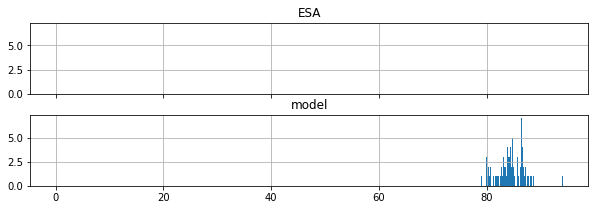

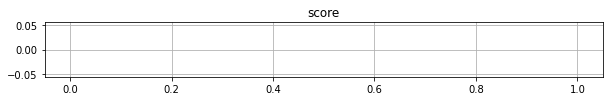

In [15]:
results.loc[results['part']=='train'].hist(column=['ESA', 'model'],
                                           sharex=True, sharey=True, bins=100, layout=(2,1), figsize=(10, 3));
results.loc[results['part']=='train'].hist(column=['score'],
                                           bins=100, figsize=(10, 1));

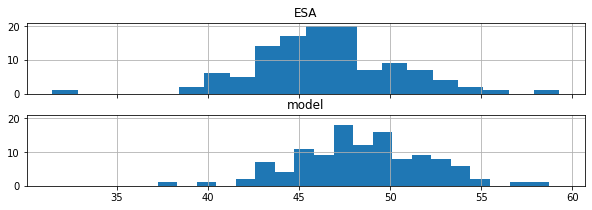

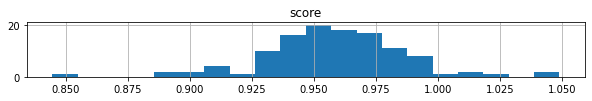

In [14]:
results.loc[results['part']=='val'].hist(column=['ESA', 'model'],
                                           sharex=True, sharey=True, bins=20, layout=(2,1), figsize=(10, 3));
results.loc[results['part']=='val'].hist(column=['score'],
                                           bins=20, figsize=(10, 1));

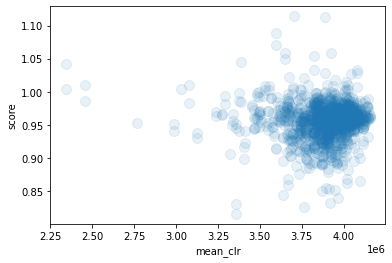

In [15]:
results.plot.scatter('mean_clr', 'score', s=100, alpha=.1);

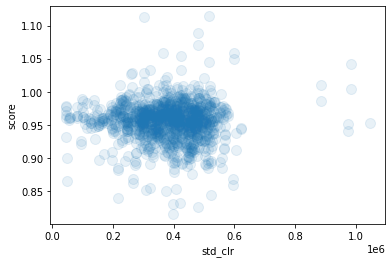

In [16]:
results.plot.scatter('std_clr', 'score', s=100, alpha=.1);

## 1.5 Pretty pics

In [51]:
results[results['part'] == 'val'].sort_values('model')

,ESA,model,clr,part,score,mean_clr,std_clr
imgset230,NaN,29.985268,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset204,NaN,31.984167,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset144,NaN,33.473221,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset200,NaN,33.745785,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset239,NaN,34.363037,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset133,NaN,35.694191,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset001,NaN,36.900772,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset004,NaN,38.277058,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset124,NaN,38.401520,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0
imgset116,NaN,38.933769,"[4177920, 4177920, 4177920, 4177920, 4177920, ...",val,NaN,4177920.0,0.0


/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/RED/imgset140
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/RED/imgset133
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/NIR/imgset200
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/RED/imgset138
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/RED/imgset144
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/NIR/imgset004
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/RED/imgset226
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/RED/imgset239
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/RED/imgset124
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/NIR/imgset204
/home/ubadmin/Documents/Scripts/highres_net/HighRes-net-master/data/train/NIR/imgset001
/home/ubadmin/Documents/Scripts/

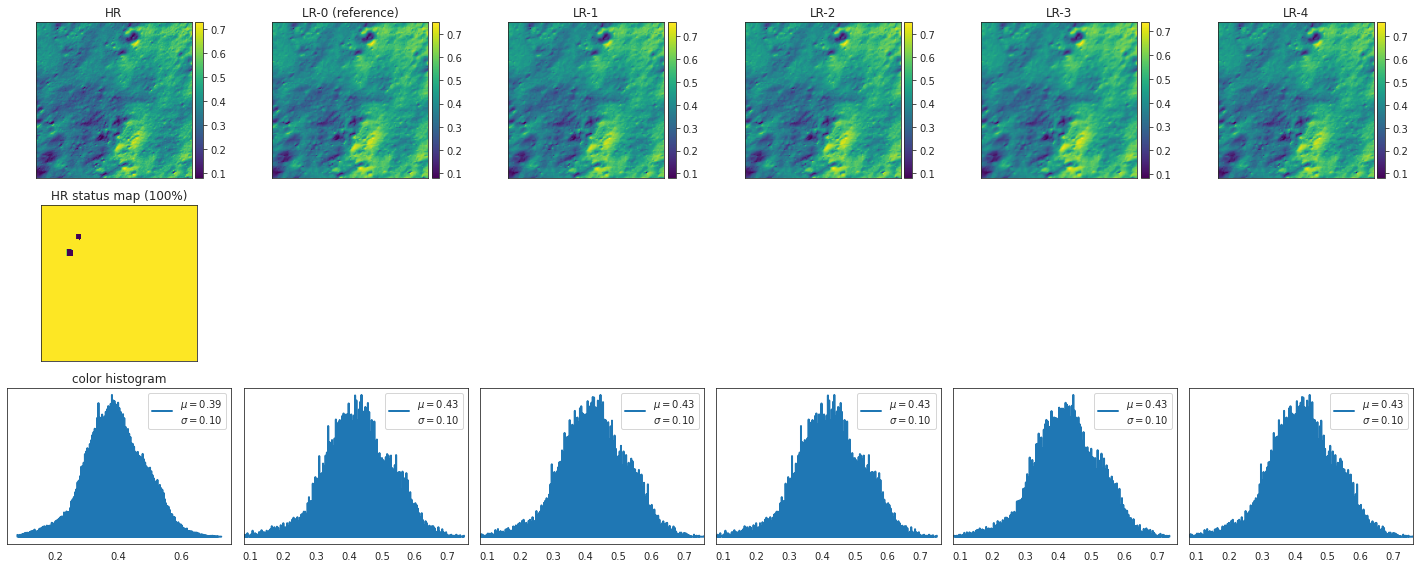

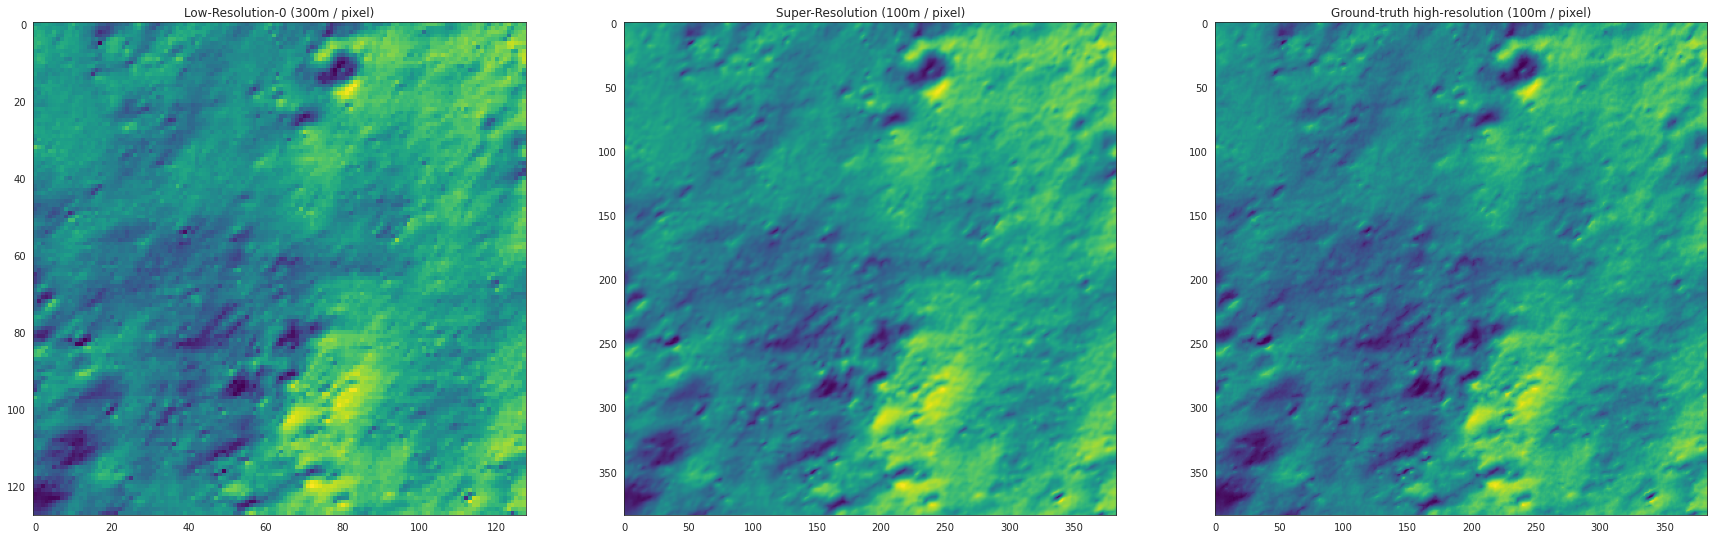

In [52]:
for key in val_dataset.imset_dir:
    print(key)

imset = val_dataset['imgset004']
sr, scPSNR = model(imset)

imsetshow(imset, k=5, figsize=(20,8), resample=False, show_histogram=True, show_map=True)
print(scPSNR)
plt.figure(figsize=(30, 10))
plt.subplot(131);  plt.imshow(imset['lr'][0]);  plt.title('Low-Resolution-0 (300m / pixel)');
plt.subplot(132);  plt.imshow(sr);  plt.title('Super-Resolution (100m / pixel)');
plt.subplot(133);  plt.imshow(imset['hr']);  plt.title('Ground-truth high-resolution (100m / pixel)');


## 1.6 Generate submission file

In [17]:
model.generate_submission_file(imset_dataset=test_dataset, out='../submission')

generating solutions: 

HR After loading:  [[4864 5120 5120 ... 4864 4864 4864]
 [4864 4864 4864 ... 4864 4864 4864]
 [4864 4864 5120 ... 4864 4864 5120]
 ...
 [5888 5632 5376 ... 5120 5120 5120]
 [6144 5888 5632 ... 5120 5120 5120]
 [6144 6144 6400 ... 5120 5120 5120]]
 HR with CV:  [[[19 19 19]
  [20 20 20]
  [20 20 20]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[19 19 19]
  [19 19 19]
  [20 20 20]
  ...
  [19 19 19]
  [19 19 19]
  [20 20 20]]

 ...

 [[23 23 23]
  [22 22 22]
  [21 21 21]
  ...
  [20 20 20]
  [20 20 20]
  [20 20 20]]

 [[24 24 24]
  [23 23 23]
  [22 22 22]
  ...
  [20 20 20]
  [20 20 20]
  [20 20 20]]

 [[24 24 24]
  [24 24 24]
  [25 25 25]
  ...
  [20 20 20]
  [20 20 20]
  [20 20 20]]]
LR before tensor:  [[[4864 4864 4864 ... 4864 4864 4864]
  [4864 4864 4864 ... 4864 4864 4864]
  [4864 4864 4864 ... 4864 4864 4864]
  ...
  [4864 4864 4864 ... 5120 5120 5120]
  [5120 5120 4864 ... 5120 5120 5120]
  

*HR After loading:  [[42496 43264 44288 ... 47104 46848 46336]
 [42240 41728 41216 ... 47104 46336 45824]
 [39936 39168 38400 ... 45568 44544 43776]
 ...
 [37120 37888 38912 ... 39936 39936 40704]
 [38144 38912 39680 ... 37888 37632 37888]
 [39168 39936 40192 ... 36352 35584 34560]]
 HR with CV:  [[[166 166 166]
  [169 169 169]
  [173 173 173]
  ...
  [184 184 184]
  [183 183 183]
  [181 181 181]]

 [[165 165 165]
  [163 163 163]
  [161 161 161]
  ...
  [184 184 184]
  [181 181 181]
  [179 179 179]]

 [[156 156 156]
  [153 153 153]
  [150 150 150]
  ...
  [178 178 178]
  [174 174 174]
  [171 171 171]]

 ...

 [[145 145 145]
  [148 148 148]
  [152 152 152]
  ...
  [156 156 156]
  [156 156 156]
  [159 159 159]]

 [[149 149 149]
  [152 152 152]
  [155 155 155]
  ...
  [148 148 148]
  [147 147 147]
  [148 148 148]]

 [[153 153 153]
  [156 156 156]
  [157 157 157]
  ...
  [142 142 142]
  [139 139 139]
  [135 135 135]]]
LR before tensor:  [[[40192 37376 37376 ... 48384 46848 44800]
  [34048 

*HR After loading:  [[26112 25600 26624 ... 43776 42752 42240]
 [25600 25856 26368 ... 43776 42240 41728]
 [25856 25856 26624 ... 42496 41216 40704]
 ...
 [31488 30720 29440 ... 36608 35840 36352]
 [30464 29440 28672 ... 36352 36352 37120]
 [29440 29440 28928 ... 36352 36096 37632]]
 HR with CV:  [[[102 102 102]
  [100 100 100]
  [104 104 104]
  ...
  [171 171 171]
  [167 167 167]
  [165 165 165]]

 [[100 100 100]
  [101 101 101]
  [103 103 103]
  ...
  [171 171 171]
  [165 165 165]
  [163 163 163]]

 [[101 101 101]
  [101 101 101]
  [104 104 104]
  ...
  [166 166 166]
  [161 161 161]
  [159 159 159]]

 ...

 [[123 123 123]
  [120 120 120]
  [115 115 115]
  ...
  [143 143 143]
  [140 140 140]
  [142 142 142]]

 [[119 119 119]
  [115 115 115]
  [112 112 112]
  ...
  [142 142 142]
  [142 142 142]
  [145 145 145]]

 [[115 115 115]
  [115 115 115]
  [113 113 113]
  ...
  [142 142 142]
  [141 141 141]
  [147 147 147]]]
LR before tensor:  [[[25088 25088 25600 ... 36096 40960 40960]
  [24576 

*HR After loading:  [[52224 48896 44544 ... 39424 38912 39168]
 [50688 47872 41984 ... 39168 38912 39168]
 [48384 41984 37376 ... 38400 37376 38144]
 ...
 [24064 24320 23808 ... 25088 24320 23040]
 [24320 24320 24320 ... 24064 23296 22784]
 [24832 24832 24832 ... 23552 23296 23296]]
 HR with CV:  [[[204 204 204]
  [191 191 191]
  [174 174 174]
  ...
  [154 154 154]
  [152 152 152]
  [153 153 153]]

 [[198 198 198]
  [187 187 187]
  [164 164 164]
  ...
  [153 153 153]
  [152 152 152]
  [153 153 153]]

 [[189 189 189]
  [164 164 164]
  [146 146 146]
  ...
  [150 150 150]
  [146 146 146]
  [149 149 149]]

 ...

 [[ 94  94  94]
  [ 95  95  95]
  [ 93  93  93]
  ...
  [ 98  98  98]
  [ 95  95  95]
  [ 90  90  90]]

 [[ 95  95  95]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [ 94  94  94]
  [ 91  91  91]
  [ 89  89  89]]

 [[ 97  97  97]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [ 92  92  92]
  [ 91  91  91]
  [ 91  91  91]]]
LR before tensor:  [[[46848 40960 41472 ... 40448 37888 37632]
  [43520 

*HR After loading:  [[ 4864  4864  4864 ... 53248 52992 52480]
 [ 4864  4864  4864 ... 53504 54272 54784]
 [ 4864  4864  4864 ... 51712 51712 50688]
 ...
 [41216 43264 42240 ... 23808 23552 23552]
 [41472 42752 43264 ... 23808 23296 24064]
 [41984 43264 43264 ... 23296 24064 24832]]
 HR with CV:  [[[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [208 208 208]
  [207 207 207]
  [205 205 205]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [209 209 209]
  [212 212 212]
  [214 214 214]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [202 202 202]
  [202 202 202]
  [198 198 198]]

 ...

 [[161 161 161]
  [169 169 169]
  [165 165 165]
  ...
  [ 93  93  93]
  [ 92  92  92]
  [ 92  92  92]]

 [[162 162 162]
  [167 167 167]
  [169 169 169]
  ...
  [ 93  93  93]
  [ 91  91  91]
  [ 94  94  94]]

 [[164 164 164]
  [169 169 169]
  [169 169 169]
  ...
  [ 91  91  91]
  [ 94  94  94]
  [ 97  97  97]]]
LR before tensor:  [[[ 4864  4864  4864 ... 51456 51968 51712]
  [ 4864 

*HR After loading:  [[23040 23552 24576 ... 24832 28416 29952]
 [23040 24320 24832 ... 29440 30720 28928]
 [22016 23040 24064 ... 31488 29440 27904]
 ...
 [38656 39168 40192 ... 23808 20480 14080]
 [39424 40448 41472 ... 20480 16384 14592]
 [39168 40192 41216 ... 19456 18944 21504]]
 HR with CV:  [[[ 90  90  90]
  [ 92  92  92]
  [ 96  96  96]
  ...
  [ 97  97  97]
  [111 111 111]
  [117 117 117]]

 [[ 90  90  90]
  [ 95  95  95]
  [ 97  97  97]
  ...
  [115 115 115]
  [120 120 120]
  [113 113 113]]

 [[ 86  86  86]
  [ 90  90  90]
  [ 94  94  94]
  ...
  [123 123 123]
  [115 115 115]
  [109 109 109]]

 ...

 [[151 151 151]
  [153 153 153]
  [157 157 157]
  ...
  [ 93  93  93]
  [ 80  80  80]
  [ 55  55  55]]

 [[154 154 154]
  [158 158 158]
  [162 162 162]
  ...
  [ 80  80  80]
  [ 64  64  64]
  [ 57  57  57]]

 [[153 153 153]
  [157 157 157]
  [161 161 161]
  ...
  [ 76  76  76]
  [ 74  74  74]
  [ 84  84  84]]]
LR before tensor:  [[[24320 24320 27392 ... 22528 23808 30720]
  [22528 

*

archiving: 
************
done. The submission-file is found at ../submission/submission.zip. Bye!
